*This notebook was created by Sergey Tomin (sergey.tomin@xfel.eu). Source and license info is on [GitHub](https://github.com/ocelot-collab/ocelot). June 2018.*

# R - matrices

The coordinates in OCELOT are following:
$$ 
\left (x, \quad x' = \frac{p_x}{p_0} \right), \qquad \left (y, \quad y' = \frac{p_y}{p_0} \right), \qquad \left (\sigma = c\tau, \quad \delta = \frac{\Delta E}{p_0 c} \right)
$$

## RF cavity. Standing wave.
### Transverse movement
RF - focusing effect is taken from [J. Rosenzweig and L. Serafini. Transverse particle motion in radio-frequency linear accelerators](https://journals.aps.org/pre/pdf/10.1103/PhysRevE.49.1599). We use eq. 13 in our code:

\begin{equation} 
\begin{bmatrix}
    \cos \alpha - \sqrt{\frac{2}{\eta(\phi)}}\cos\phi \sin\alpha & \sqrt{\frac{8}{\eta(\phi)}}\frac{\gamma_i}{\gamma'}\cos\phi\sin\alpha \\
    -\frac{\gamma'}{\gamma_f}\Big(\frac{\cos\phi}{\sqrt{2\eta(\phi)}} + \sqrt{\frac{\eta(\phi)}{8}}\frac{1}{\cos\phi}\Big)\sin\alpha & \frac{\gamma_i}{\gamma_f}\Big(\cos\alpha + \sqrt{\frac{2}{\eta(\phi)}}\cos\phi\sin \alpha\Big)
\end{bmatrix};
\end{equation}
with $\alpha = \frac{\sqrt{\eta(\phi)/8}}{\cos\phi}\ln\frac{\gamma_f}{\gamma_i}$. The $\eta(\phi)$ is calculated from the field components, which can be obtained by using electromagnetic design computer codes or measurements. In the code we choose $\eta(\phi) = 1$ which is correct for a pure $\pi$-mode standing-wave accelerating cavity at $\phi=0$. 

**Please note, in the article (see reference above) the equation 13 contains a misprint which is easy can be found if you look at the eq.14 which is correct**

### Longitudinal movement 
The general particle sees an RF phase:
$$
\phi = \phi_0 - k s
$$
where $\phi_0$ - phase of the reference particle, $k = \frac{2\pi}{\lambda}$ with $\lambda$ - RF wavelength. The longitudinal coordinate $s$ is expressed against the OCELOT coordinate $\sigma = c\tau$ as:
$$
s = v \tau = c\beta\tau = \beta \sigma
$$

Hence the cavity causes an accelerating kick of 
$$
\widetilde E_1 = \widetilde E_0 + V \cos(\phi_0 - k \beta_0\sigma_0)
$$
where $\widetilde E_0$ the particle energy before the kick. Using the definition of the OCELOT energy coordinate:

$$
\delta_0 = \frac{\widetilde E_0 - E_0}{p_0 c}
$$
We can express $\widetilde E_0$ against $\delta_0$

$$
\widetilde E_0 = \delta_0 p_0 c + E_0
$$

The reference particle sees the accelerating kick:
$$
E_1 = E_0 + V\cos \phi_0
$$

By definition, the energy coordinate after the accelerating kick in the OCELOT coordinate system:
$$
\delta_1 = \frac{\widetilde E_1 - E_1}{p_1 c} 
$$
Inserting the variables defined above:
$$
\delta_1 = \frac{\widetilde E_0 + V \cos(\phi_0 - k \beta_0\sigma_0) - (E_0 + V\cos \phi_0)}{p_1 c}  = \frac{\delta_0 p_0 c + E_0 + V \cos(\phi_0 - k \beta_0\sigma_0) - (E_0 + V\cos \phi_0)}{p_1 c}
$$

Remembering that $pc = E\beta$ we can finally write:
$$
\boxed{\delta_1 = \frac{E_0\beta_0}{E_1\beta_1}\delta_0 + \frac{V}{E_1\beta_1}\Big(\cos(\phi_0 - k \beta_0\sigma_0) - \cos\phi_0\Big)}
$$
This expression is used to track particles with second order effect (although cos is an infinite series).

Now expand $\cos(\phi_0 - k \beta_0\sigma_0)$ about the point $\sigma_0$ to the first order:
$$
\cos(\phi_0 - k \beta_0\sigma_0) = \cos\phi_0 + k\sigma_0 \beta_0 \sin\phi_0 + O(\sigma_0)^2
$$

Replacing $\cos$ in the expression above and we have:
$$
\delta_1 = \frac{E_0\beta_0}{E_1\beta_1}\delta_0 + \frac{V  k \beta_0 \sin\phi_0}{E_1\beta_1}\sigma_0 
$$

As we can see from the equation above:
$$
\boxed{R_{65} = \frac{V  k \beta_0 \sin\phi_0}{E_1\beta_1}}; \qquad \boxed{R_{66} = \frac{E_0\beta_0}{E_1\beta_1}}
$$

### $R_{56}$

$$
\sigma = c\tau = c(t_1 - t_0) = L \Big(\frac{c}{v_1} - \frac{c}{v_0}\Big) = L\Big(\frac{1}{\beta_1} - \frac{1}{\beta_0}\Big)
$$
$$
\sigma_1 = \sigma_0 + L\Big(\frac{1}{\beta_1} - \frac{1}{\beta_0}\Big)
$$
Find the time traveling of the electron through the cavity with length $L$:

$$
t = \frac{1}{c}\int_0^L \frac{dl}{\beta(l)}
$$
where 
$$
\beta(l) = \sqrt{1 - \frac{m_0^2 c^4}{\widetilde E(l)^2}}
$$

The energy of the general particle with initial energy $\widetilde E_0$ will change at the cavity by:

$$
\widetilde E(l) = \widetilde E_0 + \frac{\widetilde{dE}}{L}l
$$

with the energy gradient

$$
\widetilde{dE} = V \cos(\phi_0 - k \beta_0\sigma_0) \approx V\cos\phi_0 + V k\sigma_0 \beta_0 \sin\phi_0 - \frac{1}{2} k^2 \beta_0^2 \cos\phi_0 \sigma_0^2
$$

Substitute expression for the particle energy from above ($\widetilde E_0 = \delta_0 p_0 c + E_0 = E_0 (1 + \delta_0\beta_0)$) we can write: 

$$
t = \frac{1}{c}\int_0^L \frac{dl}{\sqrt{1 - \frac{m_0^2 c^4}{\Big(E_0 (1 + \delta_0\beta_0) + \frac{E_1 - E_0 + V k\sigma_0 \beta_0 \sin\phi_0 - \frac{1}{2} k^2 \beta_0^2 \cos\phi_0 \sigma_0^2}{L}l\Big)^2}}}
$$

Expand the result into series with respect to $\delta$ and $\sigma$ up to second order:

\begin{equation}
\begin{split}
t = & \frac{1}{c}\int_0^L \frac{dl}{\beta(l)}  =  \frac{L}{c} \frac{E_1 \beta_1 - E_0 \beta_0}{E_1 - E_0}  + \frac{L}{c}\frac{E_0}{E_1 - E_0}\Big(\frac{\beta_0}{\beta_1} - 1 \Big)\delta_0 + \\
& k V \sin \phi_0 \frac{L\beta_0}{c \beta_1}\cdot\frac{A}{(E_0 - E_1)^2 E_1}\sigma_0 + \\
& \frac{\beta_0^3 E_0^3 - \beta_1^3 E_1^3 }{2 \beta_0 \beta_1^3 E_0 (E_0 - E_1) E_1^3} \frac{(mc^2)^2 L}{c} \delta_0^2 + \\
& k V \sin \phi \frac{L\beta_0 E_0}{c}\cdot\frac{ \beta_0 E_0 (mc^2)^2 +E_1^3 \left(\beta_1^3-\beta_0\right)}{\beta_1^3 E_1^3 (E_0-E_1)^2} \delta_0 \sigma_0 + \\
&\frac{\beta_0^2 k^2 L V }{c}\cdot\frac{E_1^2 \beta_1^2 \left(E_1 - E_0\right) A \cos \phi  + B V \sin ^2\phi }{2 \beta_1^3 E_1^3 (E_0-E_1)^3}\sigma_0 ^2
  +O(\delta_0)^3  +O(\sigma_0)^3
\end{split}
\end{equation}
with 
$$
A =  (mc^2)^2 + E_0 E_1 (\beta_0 \beta_1 -1 ); 
\qquad 
B = (mc^2)^2 \left(E_0^2  + 3 E_1^2  - 2 (mc^2)^2\right) + 2 E_0 E_1^3 (\beta_0 \beta_1^3 - 1)
$$

Finally, expressing all against $\gamma$:

\begin{equation}
\begin{split}
\sigma_1 = \sigma_0 + c(t_1 - t_0) & = \sigma_0 + L\frac{\gamma_0}{\gamma_1 - \gamma_0}\Big(\frac{\beta_0}{\beta_1} - 1 \Big)\delta_0 + \\ 
& A k L \sin \phi_0 \sigma_0 +\\
& L \frac{\beta_0^3 \gamma_0^3 - \beta_1^3 \gamma_1^3 }{2 \beta_0 \beta_1^3 \gamma_0 (\gamma_0 - \gamma_1) \gamma_1^3} \delta_0^2 + \\
&k L \frac{V}{mc^2 }\frac{\beta_0 \gamma_0  \left(\beta_0 \left(\gamma_0-\gamma_1^3\right)+\beta_1^3 \gamma_1^3\right)}{\beta_1^3 \gamma_1^3 (\gamma_0-\gamma_1)^2}\sin\phi_0 \sigma_0 \delta_0  + \\
& \frac{L k^2}{2}\left(-A \beta_0\cos \phi_0 + B \sin^2\phi_0  \right)\sigma_0^2  + O(\delta_0)^3
\end{split}
\end{equation}

where
$$
A = \beta_0 \frac{V}{mc^2}\cdot \frac{\gamma_0 \gamma_1 (\beta_0 \beta_1-1)+1}{\beta_1 \gamma_1 (\gamma_0-\gamma_1)^2}
$$
$$
B = \beta_0^2 \left(\frac{V}{mc^2}\right)^2 \cdot \frac{ 2 \gamma_0 \gamma_1^3 \left(\beta_0\beta_1^3-1\right)+\gamma_0^2+3 \gamma_1^2-2}{\beta_1^3 \gamma_1^3 (\gamma_0-\gamma_1)^3}
$$
From the expression we can find $R_{56}$, $R_{55}$ and second order elements $T_{566}$, $T_{555}$, $T_{556}$ - elements:

$$
\boxed{R_{56} = L\frac{\gamma_0}{\gamma_1 - \gamma_0}\Big(\frac{\beta_0}{\beta_1} - 1 \Big)}; \qquad \boxed{T_{566} = \frac{\beta_0^3 \gamma_0^3 - \beta_1^3 \gamma_1^3 }{2 \beta_0 \beta_1^3 \gamma_0 (\gamma_0 - \gamma_1) \gamma_1^3}}
$$

$$
\boxed{R_{55} = 1 + k L \beta_0 \frac{V}{mc^2}\sin \phi_0\cdot \frac{\gamma_0 \gamma_1 (\beta_0 \beta_1-1)+1}{\beta_1 \gamma_1 (\gamma_0-\gamma_1)^2}}
$$

$$
\boxed{T_{556} = k L \frac{V}{mc^2 }\frac{\beta_0 \gamma_0  \left(\beta_0 \left(\gamma_0-\gamma_1^3\right)+\beta_1^3 \gamma_1^3\right)}{\beta_1^3 \gamma_1^3 (\gamma_0-\gamma_1)^2}\sin\phi_0}
$$

\begin{equation}
\boxed{T_{555} = \frac{L k^2}{2}\frac{V}{mc^2}\beta_0^2\left(\frac{V}{mc^2} \cdot \frac{ 2 \gamma_0 \gamma_1^3 \left(\beta_0\beta_1^3-1\right)+\gamma_0^2+3 \gamma_1^2-2}{\beta_1^3 \gamma_1^3 (\gamma_0-\gamma_1)^3} \sin^2\phi_0  - \frac{\gamma_0 \gamma_1 (\beta_0 \beta_1-1)+1}{\beta_1 \gamma_1 (\gamma_0-\gamma_1)^2}\cos \phi_0\right)}
\end{equation}

We can rewrite $R_{56}$ expression by multiplying $\frac{\gamma_1 + \gamma_0}{\gamma_1 + \gamma_0}\frac{\beta_0 + \beta_1}{\beta_0 + \beta_1}$:
$$
R_{56} = \frac{L \gamma_0 }{\beta_1}\cdot\frac{\gamma_1 + \gamma_0}{\gamma_1^2 - \gamma_0^2}\cdot\frac{\beta_0^2 - \beta_1^2}{ \beta_0 + \beta_1 } 
$$

Substitute $\beta^2= 1 - 1/\gamma^2$ and after some minor gymnastics:

\begin{equation}
\boxed{R_{56} = 
- \frac{L}{\gamma_1^2\gamma_0 \beta_1}\cdot \frac{\gamma_1 + \gamma_0}{\beta_1 + \beta_0}}
\end{equation}

Here we can see if the energy gain in the cavity is zero than $\gamma_1 = \gamma_0$ and $\beta_1 = \beta_0$ the expression turns out to usual $R_{56}$ for the drift space $R_{56}^{drift} = -\frac{L}{\gamma^2 \beta^2}$. 

The same procedure we can repeat with $T_{566}$:
$$
T_{566}^{\Delta\gamma\to 0} = \lim_{\{\gamma_0,\beta_0\} \to \{\gamma_1, \beta_1\}}\frac{\beta_0^3 \gamma_0^3 - \beta_1^3 \gamma_1^3 }{2 \beta_0 \beta_1^3 \gamma_0 (\gamma_0 - \gamma_1) \gamma_1^3} = \frac{3 L}{2 \beta^3 \gamma^2} = T_{566}^{drift}
$$



### Hamiltonian 
The general Hamiltonian in a curved reference system with the curvature $h$ (see [Ripken]):
$$
H =  - (1 + h x) \left( q A_s + \sqrt{\frac{1}{c^2}\left(E  - q \phi\right)^2  - (mc)^2 - \left(p_x - q A_x\right)^2 - \left(p_y - q A_y\right)^2}\right)
$$
with $s$ is path length as the independant variable. The canonical pairs of variables are:
$$
(x, p_x), \qquad (y, p_y), \qquad (E, -t) 
$$

After Hamiltonian normalisation by transformations:
$$
H_1 = \frac{H}{p_s}; \qquad \left(x, p_{x1} = \frac{p_x}{p_s}\right), \qquad \left(y, p_{y1} = \frac{p_y}{p_s}\right), \qquad \left(p_{t1} = \frac{E}{p_s c}, t_1 = -c t\right)
$$

$$
H_1 =  - (1 + h x) \left( \frac{q A_s}{p_s} + \sqrt{\left(p_{t1}  - \frac{q \phi}{p_s c}\right)^2  - \frac{1}{\beta_s^2 \gamma_s^2} - \left(p_x - \frac{q A_x}{p_s}\right)^2 - \left(p_y - \frac{q A_y}{p_s}\right)^2}\right)
$$

To make a perturbation approach feasible, two variables $\frac{E}{p_s c}$ and $-ct$ (increases without limit) must be replaced by their deviations from a fixed reference. To ensure that new longitudinal variables are cononical, we defne the transformation from the old variables to the new variables in terms of a generating function. In our case we will use:

$$
F_2 = F_2(q, \overline p, t)
$$

The generating function defines the relationships between the old and new variables:

$$
p = \frac{\partial F_2}{\partial q}; \qquad \overline q = \frac{\partial F_2}{\partial \overline p}; \qquad \overline H = H + \frac{\partial F_2}{\partial t}
$$
in our case $q = \{x, y, t_1 \equiv -ct\}; \quad p=\{p_{x1}= \frac{p_x}{p_s}, p_{y1}=\frac{p_y}{p_s}, p_{t1} = \frac{E}{p_s c}\}$. And independant varable $t \equiv s$

We use the particular choice of generating function: 

$$
F_2\left(x, \overline p_x, y, \overline p_y, t_1, \overline p_{t1}, s \right) = x \overline p_x + y \overline p_y + \left(\frac{s}{\beta_s} + t_1 \right)\left(\frac{1}{\beta_s} + \overline p_{t1}\right)
$$

with $\beta_s$ is constant. The first two terms are identity transformation which gives:
$$
p_{x1} = \frac{\partial F_2}{\partial x} = \overline p_{x1}; \quad p_{y1} = \overline p_{y1}; \quad \overline x = \frac{\partial F_2}{\partial \overline p_x} = x; \quad \overline y = y
$$

The old and new longitudinal variables are related by:
\begin{equation}
\begin{split}
p_{t1} &= \frac{\partial F_2}{\partial t_1} = \frac{1}{\beta_s} + \overline p_{t1} \implies \boxed{\overline p_{t1} = p_{t1} - \frac{1}{\beta_s} = \frac{E}{p_s c} - \frac{1}{\beta_s} = \frac{\Delta E}{p_s c} = \delta}\\
\overline t_1 & = \frac{\partial F_2}{\partial \overline p_s} = \frac{s}{\beta_s} + t_1 = \frac{s}{\beta_s} - c t  = \boxed{- c \left(t - \frac{s}{v_s}\right) = -c \Delta t = \sigma}
\end{split}
\end{equation}

Let's have a look on the new variable $\sigma = \frac{s}{\beta_s} - c t$. $s$ is independent variable which is the distance along the beam line (which, in turn, is the path length of the reference particle) and $v_s$ is the velocity of the reference particle, $t$ is the time at which a particle arrives at the position $s$ along the beam line. For the reference particle $\sigma = 0$ for all $s$. A particle
arriving at a particular location at an earlier time than the reference particle has $s > 0$, and a particle arriving later than the reference particle has $s < 0$.

**Note: At the moment OCELOT has opposite sign of the longitudinal coordinate $\sigma$. There is a plan to change it in accordance to MAD notation in the future** 

The new Hamiltonian:

$$
\overline H = H_1 + \frac{\partial F_2}{\partial s} =  - (1 + h \overline x) \left( \frac{q A_s}{p_s} + \sqrt{\left(\frac{1}{\beta_s} + \overline p_{t1} - \frac{q \phi}{p_s c}\right)^2  - \frac{1}{\beta_s^2 \gamma_s^2} - \left(\overline p_x - \frac{q A_x}{p_s}\right)^2 - \left(\overline p_y - \frac{q A_y}{p_s}\right)^2}\right) + \frac{1}{\beta_s^2} + \frac{\overline p_{t1}}{\beta_s}
$$

And, finally, we note that the constant term $\frac{1}{\beta_s^2}$ in the Hamiltonian has no significance for the dynamics; so we simply drop this term, and write the Hamiltonian:

$$
\boxed{K = \frac{\delta}{\beta_s} - (1 + h x) \sqrt{\left(\frac{1}{\beta_s} + \delta - \frac{q \phi}{p_s c}\right)^2  - \frac{1}{\beta_s^2 \gamma_s^2} - \left(p_x - \frac{q A_x}{p_s}\right)^2 - \left(p_y - \frac{q A_y}{p_s}\right)^2}- (1 + h x)\frac{q A_s}{p_s}}
$$




### Hamiltonian for Transverse magnetic fields

$$
\boxed{K = \frac{\delta}{\beta_s} - (1 + h_x x + h_y y) \sqrt{\left(\frac{1}{\beta_s} + \delta - \frac{q \phi}{p_s c}\right)^2  - \frac{1}{\beta_s^2 \gamma_s^2} - \left(p_x - \frac{q A_x}{p_s}\right)^2 - \left(p_y - \frac{q A_y}{p_s}\right)^2}- (1 + h_x x + h_y y)\frac{q A_s}{p_s}}
$$


Vector potentials
$$
A_x = A_y = 0
$$

$$
\boxed{K = \frac{\delta}{\beta_s} - (1 + h_x x + h_y y) \sqrt{\left(\frac{1}{\beta_s} + \delta \right)^2  - \frac{1}{\beta_s^2 \gamma_s^2} - p_x^2 - p_y^2}- (1 + h_x x + h_y y)\frac{q A_s}{p_s}}
$$


Expanding $\sqrt{(...)}$ in the Hamiltonian to second order in the dynamical variables:

$$
\sqrt{\left(\frac{1}{\beta_s} + \delta \right)^2  - \frac{1}{\beta_s^2 \gamma_s^2} - p_x^2 - p_y^2} = 1+\delta -\frac{\delta^2}{2 \beta_s ^2 \gamma_s ^2}-\frac{p_x^2}{2}-\frac{p_y^2}{2} + O^3
$$

$$
\boxed{K = \frac{\delta}{\beta_s} - (1 + h_x x + h_y y) \left( 1+\delta -\frac{\delta^2}{2 \beta_s ^2 \gamma_s ^2}-\frac{p_x^2}{2}-\frac{p_y^2}{2} + \frac{q A_s}{p_s}\right)}
$$
#### Quad 
$$
A_s = \left(\frac{\partial B_y}{\partial x}\right)_{x=y=0} \frac{1}{2}(y^2 - x^2)
$$

In the following we rewrite the term $\frac{q A_s}{p_s}$
$$
\frac{q A_s}{p_s} = \frac{1}{2}k_1(y^2 - x^2)
$$

for $h_x = h_y = 0$

$$
H_2 = \frac{\delta^2}{2 \beta_s ^2 \gamma_s ^2}+\frac{p_x^2}{2}+\frac{p_y^2}{2} - \frac{1}{2}k_1(y^2 - x^2)
$$

\begin{equation}
\begin{split}
x' &= \frac{\partial H_2}{\partial p_x} = p_x; \qquad p_x' = - \frac{\partial H_2}{\partial x} = -k_1 x\\
y' &= \frac{\partial H_2}{\partial p_y} = p_y; \qquad p_y' = - \frac{\partial H_2}{\partial y} = k_1 y\\
\sigma' &= \frac{\partial H_2}{\partial \delta} = \frac{\delta}{\beta_s ^2 \gamma_s ^2}; \qquad \delta' = - \frac{\partial H_2}{\partial \sigma} = 0\\
\end{split}
\end{equation}

### Hamiltonian for RF cavity 

The fields in a cylindrical rf cavities the field components in the $TM_{010}$ in cylindrical polar co-ordinates $(r; \theta; s)$, and using a notation where the fields are expressed as real numbers, the components of the electric field can be written:
\begin{equation}
\begin{split}
E_r &= 0 \\
E_{\theta} &= 0 \\
E_s &= E_0 J_0(kr)\sin(\omega t + \phi_0)
\end{split}
\end{equation}

The components of the magnetic field can be written:
\begin{equation}
\begin{split}
B_r &= 0 \\
B_{\theta} &= \frac{E_0}{c} J_1(kr)\cos(\omega t + \phi_0) \\
B_s &= 0
\end{split}
\end{equation}

A suitable potential is given (in cylindrical polar co-ordinates) by:

$$
A = \left(0, 0, \frac{E_0}{\omega}J_0(kr)\cos(\omega t + \phi_0) \right)
$$

Note that the vector potential depends on the time $t$. The time is related to the independent variable $s$ by expression what we introduce above $\sigma = \frac{s}{\beta_s} - c t$. Using which we can write:
$$
\omega t = \frac{\omega}{c} \left(\frac{s}{\beta_s} - \sigma\right) = k \left(\frac{s}{\beta_s} - \sigma\right)
$$

Since the reference trajectory has zero curvature, the Hamiltonian for a particle in an rf cavity in the $TM_{010}$ mode is:

$$
H = \frac{\delta}{\beta_s} - \sqrt{\left(\frac{1}{\beta_s} + \delta \right)^2  - \frac{1}{\beta_s^2 \gamma_s^2} - p_x^2 - p_y^2}- \frac{q}{p_s}\frac{E_0}{\omega}J_0(kr)\cos\left(k\frac{s}{\beta_s} - k \sigma + \phi_0\right)
$$

where $r = \sqrt{x^2 + y^2}$. This Hamiltonian has an explicit dependence on the independent variable $s$. The explicit dependence on the independent variable makes it difficult to integrate the equations of motion. To simplify the problem, we average the Hamiltonian over the length of the cavity:
$$
\langle H \rangle = \frac{1}{L}\int_{-L/2}^{L/2} H \mathrm{d}s
$$

Note, the length of the cavity should satisfy condition $\frac{L}{\beta_s c} = \frac{\pi}{\omega}$. Expanding the last term of the Hamiltonian using $\cos\left(x + y\right) = \cos x \cos y - \sin x \sin y$ we find:
$$
\frac{1}{L}\int_{-L/2}^{L/2} \sin\left(k\frac{s}{\beta_s}\right) \mathrm{d}s = 0; \qquad \frac{1}{L}\int_{-L/2}^{L/2} \cos\left(k\frac{s}{\beta_s}\right) \mathrm{d}s = \frac{2\beta_s}{k L} \sin\left(\frac{k L}{2 \beta_s}\right) = \frac{2}{\pi};
$$


### RF-focusing effect. Comparison with ASTRA.

RF field on the cavity axis was replaced by ideal sinus-like field 
<img src="astra_data/astra_field.png" />

### Phase: 40 deg. One slice
For cross-checking "standard" ACC1 beam file was modified: longitudinal coordinates were set to zero. 

$\Delta E = 145 MeV$, $\phi = 40$, $E_i = 6.5 MeV$

d sigma =  0.0  um
ASTRA: start energy =  6.5573408179118235  MeV
ASTRA: end energy =  151.45086206371445  MeV
ASTRA: dE =  0.14489352124580263  MeV
OCELOT: start energy =  6.5573408179118235  MeV
z = 11.2484 / 11.248400000000004 : applied:  applied:  
OCELOT: end energy =  151.45086206371457  MeV
OCELOT: D_sigma =  0.5627368337466447  um
ASTRA: D_sigma =  3.409319456454972  um


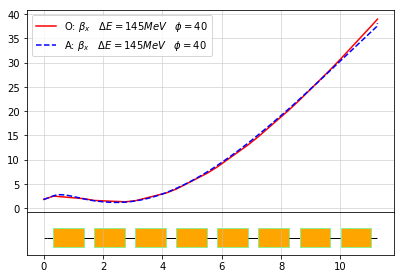

In [2]:
"""
H_max=0.04
H_min=0.0002
"""
%matplotlib inline
import sys
sys.path.append("/Users/tomins/ownCloud/DESY/repository/ocelot")
from ocelot import *
from ocelot.common.globals import *
from injector_lattice import *
from ocelot.gui.accelerator import *
import time
from ocelot.adaptors.astra2ocelot import *

p_array_init = load_particle_array("astra_data/init_beam_slice.npz")
tau = p_array_init.tau()
print("d sigma = ",  (np.max(tau) - np.min(tau))*1e6, " um")

p_array_end = load_particle_array("astra_data/ast_end_40d_slice.npz")
print("ASTRA: start energy = ", p_array_init.E*1000, " MeV")
print("ASTRA: end energy = ", p_array_end.E*1000, " MeV")
dE = p_array_end.E - p_array_init.E
print("ASTRA: dE = ", dE, " MeV")


phi1 = 41.3 
V1=dE/np.cos(phi1*pi/180)/8

C_A1_1_1_I1.v = V1; C_A1_1_1_I1.phi = phi1
C_A1_1_2_I1.v = V1; C_A1_1_2_I1.phi = phi1
C_A1_1_3_I1.v = V1; C_A1_1_3_I1.phi = phi1
C_A1_1_4_I1.v = V1; C_A1_1_4_I1.phi = phi1
C_A1_1_5_I1.v = V1; C_A1_1_5_I1.phi = phi1
C_A1_1_6_I1.v = V1; C_A1_1_6_I1.phi = phi1
C_A1_1_7_I1.v = V1; C_A1_1_7_I1.phi = phi1
C_A1_1_8_I1.v = V1; C_A1_1_8_I1.phi = phi1

method = MethodTM()
method.global_method = SecondTM
lat = MagneticLattice(cell, start=start_sim, stop=stop_A1, method=method)

navi = Navigator(lat)

# deep copy of the initial beam distribution 
p_array = deepcopy(p_array_init)
start = time.time()
print("OCELOT: start energy = ", p_array.E*1000, " MeV")
tws_track, p_array = track(lat, p_array, navi)

print()
print("OCELOT: end energy = ", p_array.E*1000, " MeV")

#compare_beams(p_array, p_array_end,  legend_beam1="ocelot", legend_beam2="astra", 
#              figsize=(10, 8))

print("OCELOT: D_sigma = ", (np.max(p_array.tau()) - np.min(p_array.tau()))*1e6, " um")
print("ASTRA: D_sigma = ", (np.max(p_array_end.tau()) - np.min(p_array_end.tau()))*1e6, " um")
#tws_astra = emittance_analysis(fileprefix="Exfel", s_offset = 0, trace_space=True)

fig, ax_xy = plot_API(lat, legend=False)
s_oc = [tw.s for tw in tws_track]
bx_oc = [tw.beta_x for tw in tws_track]

s_as4, bx_as4 = np.loadtxt("astra_data/phase_40d_slice_as.txt")

ax_xy.plot(s_oc, bx_oc, "r-",  label= "O:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=40$")
ax_xy.plot(s_as4, bx_as4, "b--", label= "A:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=40$")

ax_xy.legend()
plt.show()


### Phase 20 deg. One slice

d sigma =  0.0  um
ASTRA: start energy =  6.5573408179118235  MeV
ASTRA: end energy =  151.49086183609307  MeV
ASTRA: dE =  0.14493352101818127  MeV
OCELOT: start energy =  6.5573408179118235  MeV
z = 11.2484 / 11.248400000000004 : applied:  applied:  
OCELOT: end energy =  151.4908618360932  MeV
OCELOT: D_sigma =  0.5530052952049079  um
ASTRA: D_sigma =  2.550714547737217  um


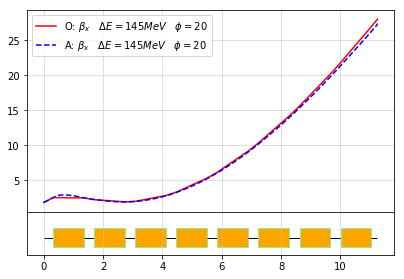

0.9909704606283686

In [2]:
"""
H_max=0.04
H_min=0.0002
"""
p_array_init = load_particle_array("astra_data/init_beam_slice.npz")
tau = p_array_init.tau()
print("d sigma = ",  (np.max(tau) - np.min(tau))*1e6, " um")

p_array_end = load_particle_array("astra_data/ast_end_20d_slice.npz")
print("ASTRA: start energy = ", p_array_init.E*1000, " MeV")
print("ASTRA: end energy = ", p_array_end.E*1000, " MeV")
dE = p_array_end.E - p_array_init.E
print("ASTRA: dE = ", dE, " MeV")


phi1 = 21.3 
V1=dE/np.cos(phi1*pi/180)/8

C_A1_1_1_I1.v = V1; C_A1_1_1_I1.phi = phi1
C_A1_1_2_I1.v = V1; C_A1_1_2_I1.phi = phi1
C_A1_1_3_I1.v = V1; C_A1_1_3_I1.phi = phi1
C_A1_1_4_I1.v = V1; C_A1_1_4_I1.phi = phi1
C_A1_1_5_I1.v = V1; C_A1_1_5_I1.phi = phi1
C_A1_1_6_I1.v = V1; C_A1_1_6_I1.phi = phi1
C_A1_1_7_I1.v = V1; C_A1_1_7_I1.phi = phi1
C_A1_1_8_I1.v = V1; C_A1_1_8_I1.phi = phi1

method = MethodTM()
method.global_method = SecondTM
lat = MagneticLattice(cell, start=start_sim, stop=stop_A1, method=method)

navi = Navigator(lat)

# deep copy of the initial beam distribution 
p_array = deepcopy(p_array_init)
start = time.time()
print("OCELOT: start energy = ", p_array.E*1000, " MeV")
tws_track, p_array = track(lat, p_array, navi)
print()
print("OCELOT: end energy = ", p_array.E*1000, " MeV")
#compare_beams(p_array, p_array_end,  legend_beam1="ocelot", legend_beam2="astra", 
#              figsize=(10, 8))

print("OCELOT: D_sigma = ", (np.max(p_array.tau()) - np.min(p_array.tau()))*1e6, " um")
print("ASTRA: D_sigma = ", (np.max(p_array_end.tau()) - np.min(p_array_end.tau()))*1e6, " um")
#tws_astra = emittance_analysis(fileprefix="Exfel", s_offset = 0, trace_space=True)

fig, ax_xy = plot_API(lat, legend=False)
s_oc = [tw.s for tw in tws_track]
bx_oc = [tw.beta_x for tw in tws_track]

s_as3, bx_as3 = np.loadtxt("astra_data/phase_20d_slice_as.txt")

ax_xy.plot(s_oc, bx_oc, "r-",  label= "O:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=20$")
ax_xy.plot(s_as3, bx_as3, "b--", label= "A:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=20$")

ax_xy.legend()
plt.show()

( 151.45086206371445)/152.83085427963246

### Zero phase. $\phi = 0$. One slice

d sigma =  0.0  um
ASTRA: start energy =  6.5573408179118235  MeV
ASTRA: end energy =  151.5608614380449  MeV
ASTRA: dE =  0.14500352062013308  MeV
OCELOT: start energy =  6.5573408179118235  MeV
z = 11.2484 / 11.248400000000004 : applied:  applied:  
OCELOT: end energy =  151.56086143804504  MeV
OCELOT: D_sigma =  0.558280507842019  um
ASTRA: D_sigma =  2.3057131364436807  um


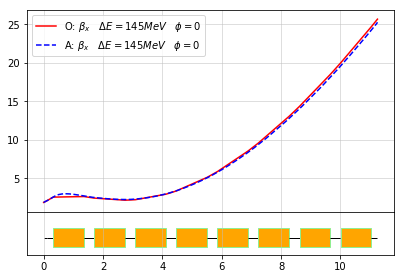

0.9829311343316508

In [3]:
"""
H_max=0.04
H_min=0.0002
"""
p_array_init = load_particle_array("astra_data/init_beam_slice.npz")
tau = p_array_init.tau()
print("d sigma = ",  (np.max(tau) - np.min(tau))*1e6, " um")

p_array_end = load_particle_array("astra_data/ast_end_0d_slice.npz")
print("ASTRA: start energy = ", p_array_init.E*1000, " MeV")
print("ASTRA: end energy = ", p_array_end.E*1000, " MeV")
dE = p_array_end.E - p_array_init.E
print("ASTRA: dE = ", dE, " MeV")


phi1 = 1.4 
V1=dE/np.cos(phi1*pi/180)/8

C_A1_1_1_I1.v = V1; C_A1_1_1_I1.phi = phi1
C_A1_1_2_I1.v = V1; C_A1_1_2_I1.phi = phi1
C_A1_1_3_I1.v = V1; C_A1_1_3_I1.phi = phi1
C_A1_1_4_I1.v = V1; C_A1_1_4_I1.phi = phi1
C_A1_1_5_I1.v = V1; C_A1_1_5_I1.phi = phi1
C_A1_1_6_I1.v = V1; C_A1_1_6_I1.phi = phi1
C_A1_1_7_I1.v = V1; C_A1_1_7_I1.phi = phi1
C_A1_1_8_I1.v = V1; C_A1_1_8_I1.phi = phi1

method = MethodTM()
method.global_method = SecondTM
lat = MagneticLattice(cell, start=start_sim, stop=stop_A1, method=method)

navi = Navigator(lat)

# deep copy of the initial beam distribution 
p_array = deepcopy(p_array_init)
start = time.time()
print("OCELOT: start energy = ", p_array.E*1000, " MeV")
tws_track, p_array = track(lat, p_array, navi)
print()
print("OCELOT: end energy = ", p_array.E*1000, " MeV")
#compare_beams(p_array, p_array_end,  legend_beam1="ocelot", legend_beam2="astra", 
#              figsize=(10, 8))

print("OCELOT: D_sigma = ", (np.max(p_array.tau()) - np.min(p_array.tau()))*1e6, " um")
print("ASTRA: D_sigma = ", (np.max(p_array_end.tau()) - np.min(p_array_end.tau()))*1e6, " um")
#tws_astra = emittance_analysis(fileprefix="Exfel", s_offset = 0, trace_space=True)

fig, ax_xy = plot_API(lat, legend=False)
s_oc = [tw.s for tw in tws_track]
bx_oc = [tw.beta_x for tw in tws_track]

s_as2, bx_as2 = np.loadtxt("astra_data/phase_0d_slice_as.txt")


ax_xy.plot(s_oc, bx_oc, "r-",  label= "O:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=0$")
ax_xy.plot(s_as2, bx_as2, "b--", label= "A:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=0$")

ax_xy.legend()
plt.show()

151.45086206371445/154.08084734918307 

### Phase -40 deg. One slice

d sigma =  0.0  um
ASTRA: start energy =  6.5573408179118235  MeV
ASTRA: end energy =  156.9908316426225  MeV
ASTRA: dE =  0.1504334908247107  MeV
OCELOT: start energy =  6.5573408179118235  MeV
z = 11.2484 / 11.248400000000004 : applied:  applied:  
OCELOT: end energy =  156.99083164262265  MeV
OCELOT: D_sigma =  0.5921171165888933  um
ASTRA: D_sigma =  3.037116158441305  um


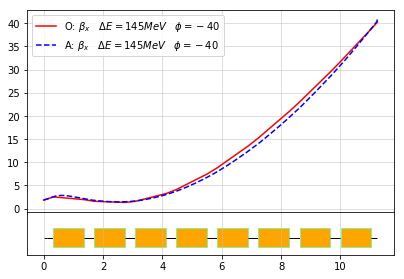

In [4]:
"""
H_max=0.04
H_min=0.0002
"""
p_array_init = load_particle_array("astra_data/init_beam_slice.npz")
tau = p_array_init.tau()
print("d sigma = ",  (np.max(tau) - np.min(tau))*1e6, " um")

p_array_end = load_particle_array("astra_data/ast_end_m40d_slice.npz")
print("ASTRA: start energy = ", p_array_init.E*1000, " MeV")
print("ASTRA: end energy = ", p_array_end.E*1000, " MeV")
dE = p_array_end.E - p_array_init.E
print("ASTRA: dE = ", dE, " MeV")


phi1 = -38.6 
V1=dE/np.cos(phi1*pi/180)/8

C_A1_1_1_I1.v = V1; C_A1_1_1_I1.phi = phi1
C_A1_1_2_I1.v = V1; C_A1_1_2_I1.phi = phi1
C_A1_1_3_I1.v = V1; C_A1_1_3_I1.phi = phi1
C_A1_1_4_I1.v = V1; C_A1_1_4_I1.phi = phi1
C_A1_1_5_I1.v = V1; C_A1_1_5_I1.phi = phi1
C_A1_1_6_I1.v = V1; C_A1_1_6_I1.phi = phi1
C_A1_1_7_I1.v = V1; C_A1_1_7_I1.phi = phi1
C_A1_1_8_I1.v = V1; C_A1_1_8_I1.phi = phi1

method = MethodTM()
method.global_method = SecondTM
lat = MagneticLattice(cell, start=start_sim, stop=stop_A1, method=method)

navi = Navigator(lat)

# deep copy of the initial beam distribution 
p_array = deepcopy(p_array_init)
start = time.time()
print("OCELOT: start energy = ", p_array.E*1000, " MeV")
tws_track, p_array = track(lat, p_array, navi)
print()
print("OCELOT: end energy = ", p_array.E*1000, " MeV")
#compare_beams(p_array, p_array_end,  legend_beam1="ocelot", legend_beam2="astra", 
#              figsize=(10, 8))

print("OCELOT: D_sigma = ", (np.max(p_array.tau()) - np.min(p_array.tau()))*1e6, " um")
print("ASTRA: D_sigma = ", (np.max(p_array_end.tau()) - np.min(p_array_end.tau()))*1e6, " um")
#tws_astra = emittance_analysis(fileprefix="Exfel", s_offset = 0, trace_space=True)

fig, ax_xy = plot_API(lat, legend=False)
s_oc = [tw.s for tw in tws_track]
bx_oc = [tw.beta_x for tw in tws_track]

s_as1, bx_as1 = np.loadtxt("astra_data/phase_m40d_slice_as.txt")


ax_xy.plot(s_oc, bx_oc, "r-",  label= "O:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=-40$")
ax_xy.plot(s_as1, bx_as1, "b--", label= "A:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=-40$")

ax_xy.legend()
plt.show()




## Full beam 
### Phi = -20 deg.

d sigma =  8312.407209544674  um
ASTRA: start energy =  6.5573408179118235  MeV
ASTRA: end energy =  154.2208465799687  MeV
ASTRA: dE =  0.1476635057620569  MeV
OCELOT: start energy =  6.5573408179118235  MeV
z = 11.2484 / 11.248400000000004 : applied:  applied:  
OCELOT: end energy =  154.22084657996882  MeV
OCELOT: D_sigma =  8438.346672783127  um
ASTRA: D_sigma =  8421.046443607664  um


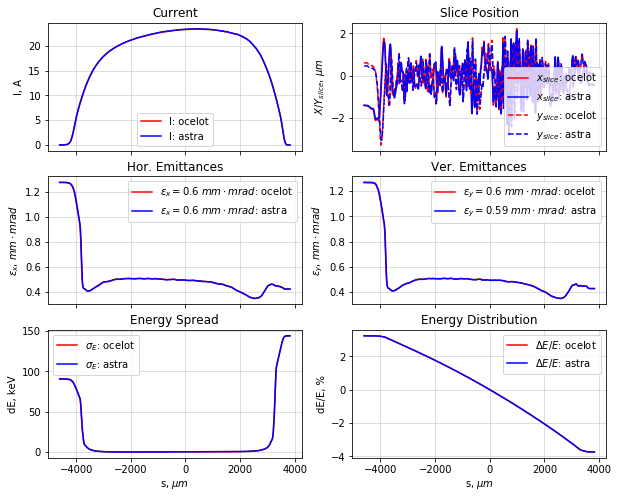

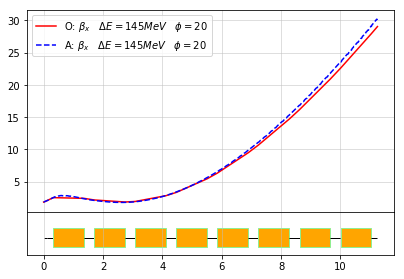

In [5]:
"""
H_max=0.002
H_min=0.0002
! ACC1  1module*8cavities
FILE_EFieLD(2)='tesla4cav_ideal.dat'
Nue(2)=1.3
MaxE(2) = 37.851845606972965
Phi(2) = 20
C_pos(2)=4.04005
FILE_EFieLD(3)='tesla4cav_ideal.dat'
Nue(3)=1.3
MaxE(3) = 37.851845606972965
Phi(3) = 20
"""
p_array_init = load_particle_array("astra_data/init_beam.npz")
tau = p_array_init.tau()
print("d sigma = ",  (np.max(tau) - np.min(tau))*1e6, " um")

p_array_end = load_particle_array("astra_data/ast_end_s2e_ideal_h002_m20d.npz")
print("ASTRA: start energy = ", p_array_init.E*1000, " MeV")
print("ASTRA: end energy = ", p_array_end.E*1000, " MeV")
dE = p_array_end.E - p_array_init.E
print("ASTRA: dE = ", dE, " MeV")


phi1 = -20
V1=dE/np.cos(phi1*pi/180)/8

C_A1_1_1_I1.v = V1; C_A1_1_1_I1.phi = phi1
C_A1_1_2_I1.v = V1; C_A1_1_2_I1.phi = phi1
C_A1_1_3_I1.v = V1; C_A1_1_3_I1.phi = phi1
C_A1_1_4_I1.v = V1; C_A1_1_4_I1.phi = phi1
C_A1_1_5_I1.v = V1; C_A1_1_5_I1.phi = phi1
C_A1_1_6_I1.v = V1; C_A1_1_6_I1.phi = phi1
C_A1_1_7_I1.v = V1; C_A1_1_7_I1.phi = phi1
C_A1_1_8_I1.v = V1; C_A1_1_8_I1.phi = phi1

method = MethodTM()
method.global_method = SecondTM
lat = MagneticLattice(cell, start=start_sim, stop=stop_A1, method=method)

navi = Navigator(lat)

# deep copy of the initial beam distribution 
p_array = deepcopy(p_array_init)
start = time.time()
print("OCELOT: start energy = ", p_array.E*1000, " MeV")
tws_track, p_array = track(lat, p_array, navi)
print()
print("OCELOT: end energy = ", p_array.E*1000, " MeV")
compare_beams(p_array, p_array_end,  legend_beam1="ocelot", legend_beam2="astra", 
              figsize=(10, 8))

print("OCELOT: D_sigma = ", (np.max(p_array.tau()) - np.min(p_array.tau()))*1e6, " um")
print("ASTRA: D_sigma = ", (np.max(p_array_end.tau()) - np.min(p_array_end.tau()))*1e6, " um")
#tws_astra = emittance_analysis(fileprefix="Exfel", s_offset = 0, trace_space=True)

fig, ax_xy = plot_API(lat, legend=False)
s_oc = [tw.s for tw in tws_track]
bx_oc = [tw.beta_x for tw in tws_track]

s_as3, bx_as3 = np.loadtxt("astra_data/phase_s2e_ideal_as_h002_m20d.txt")

ax_xy.plot(s_oc, bx_oc, "r-",  label= "O:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=20$")
ax_xy.plot(s_as3, bx_as3, "b--", label= "A:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=20$")

ax_xy.legend()
plt.show()



### Ideal field. full beam. 20 deg.

d sigma =  8312.407209544674  um
ASTRA: start energy =  6.5573408179118235  MeV
ASTRA: end energy =  154.17084685452772  MeV
ASTRA: dE =  0.1476135060366159  MeV
OCELOT: start energy =  6.5573408179118235  MeV
z = 11.2484 / 11.248400000000004 : applied:  applied:  
OCELOT: end energy =  154.1708468545279  MeV
OCELOT: D_sigma =  8233.123568673676  um
ASTRA: D_sigma =  8214.146658015341  um


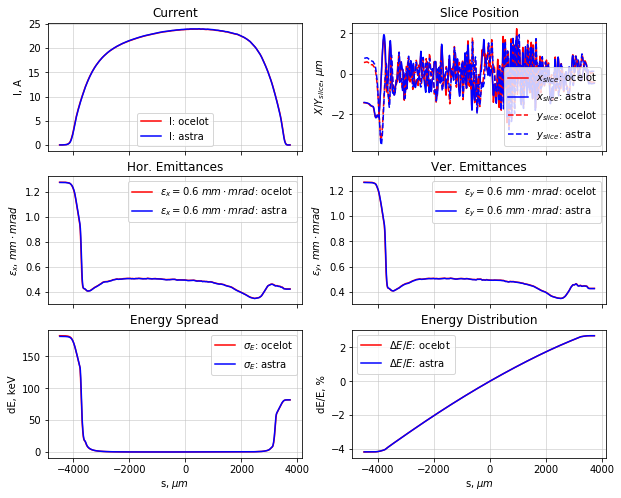

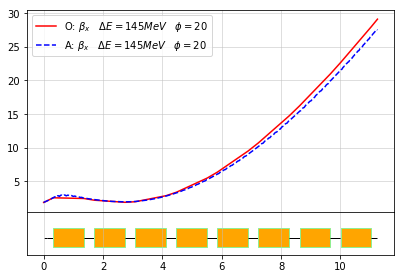

In [6]:
"""
H_max=0.002
H_min=0.0002
! ACC1  1module*8cavities
FILE_EFieLD(2)='tesla4cav_ideal.dat'
Nue(2)=1.3
MaxE(2) = 37.851845606972965
Phi(2) = -20
C_pos(2)=4.04005
FILE_EFieLD(3)='tesla4cav_ideal.dat'
Nue(3)=1.3
MaxE(3) = 37.851845606972965
Phi(3) = -20
"""
p_array_init = load_particle_array("astra_data/init_beam.npz")
tau = p_array_init.tau()
print("d sigma = ",  (np.max(tau) - np.min(tau))*1e6, " um")

p_array_end = load_particle_array("astra_data/ast_end_s2e_ideal_h002_20d.npz")
print("ASTRA: start energy = ", p_array_init.E*1000, " MeV")
print("ASTRA: end energy = ", p_array_end.E*1000, " MeV")
dE = p_array_end.E - p_array_init.E
print("ASTRA: dE = ", dE, " MeV")


phi1 = 20
V1=dE/np.cos(phi1*pi/180)/8

C_A1_1_1_I1.v = V1; C_A1_1_1_I1.phi = phi1
C_A1_1_2_I1.v = V1; C_A1_1_2_I1.phi = phi1
C_A1_1_3_I1.v = V1; C_A1_1_3_I1.phi = phi1
C_A1_1_4_I1.v = V1; C_A1_1_4_I1.phi = phi1
C_A1_1_5_I1.v = V1; C_A1_1_5_I1.phi = phi1
C_A1_1_6_I1.v = V1; C_A1_1_6_I1.phi = phi1
C_A1_1_7_I1.v = V1; C_A1_1_7_I1.phi = phi1
C_A1_1_8_I1.v = V1; C_A1_1_8_I1.phi = phi1

method = MethodTM()
method.global_method = SecondTM
lat = MagneticLattice(cell, start=start_sim, stop=stop_A1, method=method)

navi = Navigator(lat)

# deep copy of the initial beam distribution 
p_array = deepcopy(p_array_init)
start = time.time()
print("OCELOT: start energy = ", p_array.E*1000, " MeV")
tws_track, p_array = track(lat, p_array, navi)
print()
print("OCELOT: end energy = ", p_array.E*1000, " MeV")
compare_beams(p_array, p_array_end,  legend_beam1="ocelot", legend_beam2="astra", 
              figsize=(10, 8))

print("OCELOT: D_sigma = ", (np.max(p_array.tau()) - np.min(p_array.tau()))*1e6, " um")
print("ASTRA: D_sigma = ", (np.max(p_array_end.tau()) - np.min(p_array_end.tau()))*1e6, " um")
#tws_astra = emittance_analysis(fileprefix="Exfel", s_offset = 0, trace_space=True)

fig, ax_xy = plot_API(lat, legend=False)
s_oc = [tw.s for tw in tws_track]
bx_oc = [tw.beta_x for tw in tws_track]

s_as3, bx_as3 = np.loadtxt("astra_data/phase_s2e_ideal_as_h002_20d.txt")

ax_xy.plot(s_oc, bx_oc, "r-",  label= "O:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=20$")
ax_xy.plot(s_as3, bx_as3, "b--", label= "A:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=20$")

ax_xy.legend()
plt.show()




### Ideal field. full beam. 20 deg. Space Charge. 

d sigma =  8312.407209544674  um
ASTRA: start energy =  6.5573408179118235  MeV
ASTRA: end energy =  154.17084685452772  MeV
ASTRA: dE =  0.1476135060366159  MeV
OCELOT: start energy =  6.5573408179118235  MeV
z = 11.2484 / 11.248400000000004 : applied: SpaceChargeSpaceChargeee
OCELOT: end energy =  154.17084685452747  MeV
OCELOT: D_sigma =  8234.384629115066  um
ASTRA: D_sigma =  8215.84666773533  um


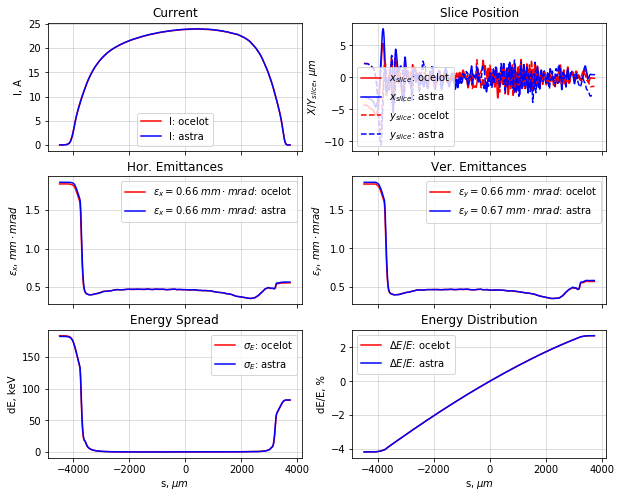

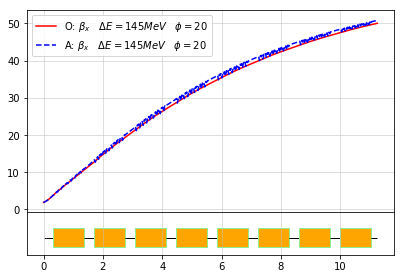

In [7]:
"""
H_max=0.002
H_min=0.0002
! ACC1  1module*8cavities
FILE_EFieLD(2)='tesla4cav_ideal.dat'
Nue(2)=1.3
MaxE(2) = 37.851845606972965
Phi(2) = -20
C_pos(2)=4.04005
FILE_EFieLD(3)='tesla4cav_ideal.dat'
Nue(3)=1.3
MaxE(3) = 37.851845606972965
Phi(3) = -20
"""
p_array_init = load_particle_array("astra_data/init_beam.npz")
tau = p_array_init.tau()
print("d sigma = ",  (np.max(tau) - np.min(tau))*1e6, " um")

p_array_end = load_particle_array("astra_data/ast_end_s2e_ideal_h002_20d_sc.npz")
print("ASTRA: start energy = ", p_array_init.E*1000, " MeV")
print("ASTRA: end energy = ", p_array_end.E*1000, " MeV")
dE = p_array_end.E - p_array_init.E
print("ASTRA: dE = ", dE, " MeV")


phi1 = 20
V1=dE/np.cos(phi1*pi/180)/8

C_A1_1_1_I1.v = V1; C_A1_1_1_I1.phi = phi1
C_A1_1_2_I1.v = V1; C_A1_1_2_I1.phi = phi1
C_A1_1_3_I1.v = V1; C_A1_1_3_I1.phi = phi1
C_A1_1_4_I1.v = V1; C_A1_1_4_I1.phi = phi1
C_A1_1_5_I1.v = V1; C_A1_1_5_I1.phi = phi1
C_A1_1_6_I1.v = V1; C_A1_1_6_I1.phi = phi1
C_A1_1_7_I1.v = V1; C_A1_1_7_I1.phi = phi1
C_A1_1_8_I1.v = V1; C_A1_1_8_I1.phi = phi1

method = MethodTM()
method.global_method = SecondTM
lat = MagneticLattice(cell, start=start_sim, stop=stop_A1, method=method)

sc1 = SpaceCharge()
sc1.nmesh_xyz = [63, 63, 63]
sc1.step = 1

sc5 = SpaceCharge()
sc5.nmesh_xyz = [63, 63, 63]
sc5.step = 5

navi = Navigator(lat)
navi.unit_step = 0.01
navi.add_physics_proc(sc1, lat.sequence[0], C_A1_1_3_I1)
navi.add_physics_proc(sc5, C_A1_1_3_I1, lat.sequence[-1])

# deep copy of the initial beam distribution 
p_array = deepcopy(p_array_init)
start = time.time()
print("OCELOT: start energy = ", p_array.E*1000, " MeV")
tws_track, p_array = track(lat, p_array, navi)
print()
print("OCELOT: end energy = ", p_array.E*1000, " MeV")
compare_beams(p_array, p_array_end,  legend_beam1="ocelot", legend_beam2="astra", 
              figsize=(10, 8))

print("OCELOT: D_sigma = ", (np.max(p_array.tau()) - np.min(p_array.tau()))*1e6, " um")
print("ASTRA: D_sigma = ", (np.max(p_array_end.tau()) - np.min(p_array_end.tau()))*1e6, " um")
#tws_astra = emittance_analysis(fileprefix="Exfel", s_offset = 0, trace_space=True)

fig, ax_xy = plot_API(lat, legend=False)
s_oc = [tw.s for tw in tws_track]
bx_oc = [tw.beta_x for tw in tws_track]

s_as3, bx_as3 = np.loadtxt("astra_data/phase_s2e_ideal_as_h002_20d_sc.txt")

ax_xy.plot(s_oc, bx_oc, "r-",  label= "O:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=20$")
ax_xy.plot(s_as3, bx_as3, "b--", label= "A:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=20$")

ax_xy.legend()
plt.show()




### Phi = 40 deg. Full beam.

d sigma =  8312.407209544674  um
ASTRA: start energy =  6.5573408179118235  MeV
ASTRA: end energy =  154.4308454287622  MeV
ASTRA: dE =  0.1478735046108504  MeV
OCELOT: start energy =  6.5573408179118235  MeV
z = 11.2484 / 11.248400000000004 : applied:  applied:  
OCELOT: end energy =  154.43084542876232  MeV
OCELOT: D_sigma =  8097.014651396012  um
ASTRA: D_sigma =  8067.84738117855  um


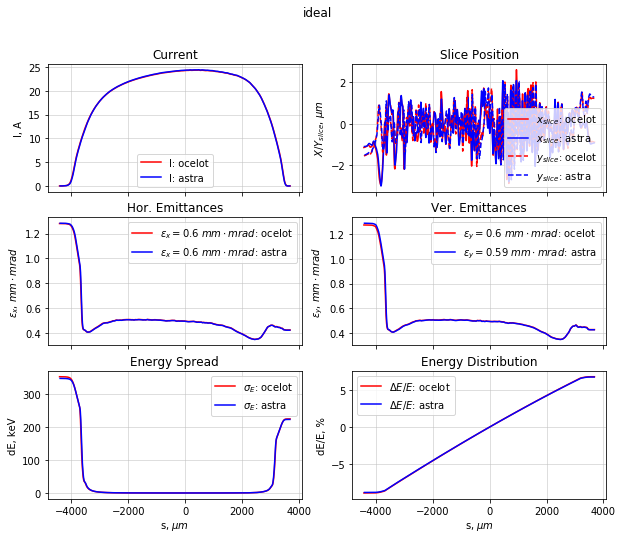

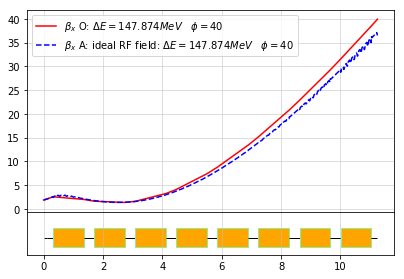

In [8]:
"""
H_max=0.002
H_min=0.0002
! ACC1  1module*8cavities
FILE_EFieLD(2)='tesla4cav_ideal.dat'
Nue(2)=1.3
MaxE(2) = 46.432162414988746
Phi(2) = -40
C_pos(2)=4.04005
FILE_EFieLD(3)='tesla4cav_ideal.dat'
Nue(3)=1.3
MaxE(3) = 46.432162414988746
Phi(3) = -40
C_pos(3)=9.57445
"""
p_array_init = load_particle_array("astra_data/init_beam.npz")
tau = p_array_init.tau()
print("d sigma = ",  (np.max(tau) - np.min(tau))*1e6, " um")

p_array_end = load_particle_array("astra_data/ast_end_s2e_ideal_h002_40d.npz")
p_array_end_real = load_particle_array("astra_data/ast_end_s2e_real_h002_40d.npz")


print("ASTRA: start energy = ", p_array_init.E*1000, " MeV")
print("ASTRA: end energy = ", p_array_end.E*1000, " MeV")
dE = p_array_end.E - p_array_init.E
dE_real = np.round((p_array_end_real.E - p_array_init.E)*1000, 3)
dE_ideal = np.round((p_array_end.E - p_array_init.E)*1000, 3)
print("ASTRA: dE = ", dE, " MeV")


phi1 = 40
V1=dE/np.cos(phi1*pi/180)/8

C_A1_1_1_I1.v = V1; C_A1_1_1_I1.phi = phi1
C_A1_1_2_I1.v = V1; C_A1_1_2_I1.phi = phi1
C_A1_1_3_I1.v = V1; C_A1_1_3_I1.phi = phi1
C_A1_1_4_I1.v = V1; C_A1_1_4_I1.phi = phi1
C_A1_1_5_I1.v = V1; C_A1_1_5_I1.phi = phi1
C_A1_1_6_I1.v = V1; C_A1_1_6_I1.phi = phi1
C_A1_1_7_I1.v = V1; C_A1_1_7_I1.phi = phi1
C_A1_1_8_I1.v = V1; C_A1_1_8_I1.phi = phi1

method = MethodTM()
method.global_method = SecondTM
lat = MagneticLattice(cell, start=start_sim, stop=stop_A1, method=method)

navi = Navigator(lat)

# deep copy of the initial beam distribution 
p_array = deepcopy(p_array_init)
start = time.time()
print("OCELOT: start energy = ", p_array.E*1000, " MeV")
tws_track, p_array = track(lat, p_array, navi)
print()
print("OCELOT: end energy = ", p_array.E*1000, " MeV")
compare_beams(p_array, p_array_end,  legend_beam1="ocelot", legend_beam2="astra", 
              figsize=(10, 8), title="ideal")

print("OCELOT: D_sigma = ", (np.max(p_array.tau()) - np.min(p_array.tau()))*1e6, " um")
print("ASTRA: D_sigma = ", (np.max(p_array_end.tau()) - np.min(p_array_end.tau()))*1e6, " um")
#tws_astra = emittance_analysis(fileprefix="Exfel", s_offset = 0, trace_space=True)

fig, ax_xy = plot_API(lat, legend=False)
s_oc = [tw.s for tw in tws_track]
bx_oc = [tw.beta_x for tw in tws_track]

s_as_i, bx_as_i = np.loadtxt("astra_data/phase_s2e_ideal_as_h002_40d.txt")
s_as_r, bx_as_r = np.loadtxt("astra_data/phase_s2e_real_as_h002_40d.txt")


ax_xy.plot(s_oc, bx_oc, "r-",  label= r"$\beta_{x}$ O: $\Delta E="+str(dE_ideal)+" MeV \quad \phi="+str(phi1)+"$")
ax_xy.plot(s_as_i, bx_as_i, "b--", label= r"$\beta_{x}$ A: ideal RF field: $\Delta E="+
           str(dE_ideal) +" MeV \quad \phi=40$")
#ax_xy.plot(s_as_r, bx_as_r, "g--", label= r"$\beta_{x}$ A: real RF field: $\Delta E="+
#           str(dE_real)+" MeV \quad \phi=40$")


ax_xy.legend()
plt.show()

### Phi = 40 deg. Full beam. Real RF field. small step

d sigma =  8312.407209544674  um
ASTRA: start energy =  6.5573408179118235  MeV
ASTRA: end energy =  160.53081330337255  MeV
ASTRA: dE =  0.15397347248546073  MeV
OCELOT: start energy =  6.5573408179118235  MeV
z = 11.2484 / 11.248400000000004 : applied:  applied:  
OCELOT: end energy =  160.53081330337267  MeV
OCELOT: D_sigma =  8106.159843368639  um
ASTRA: D_sigma =  8018.94354492589  um


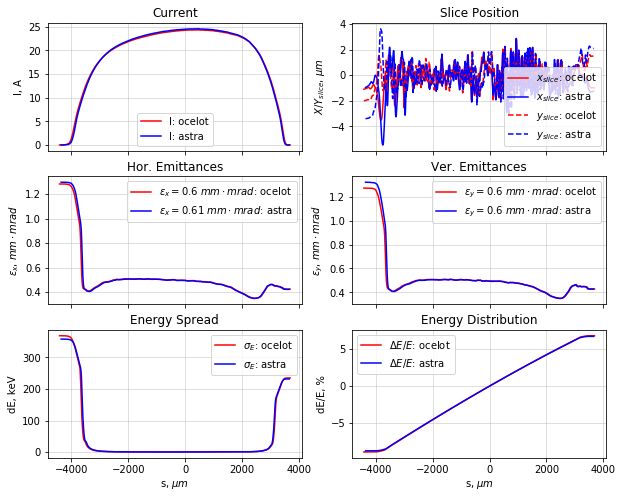

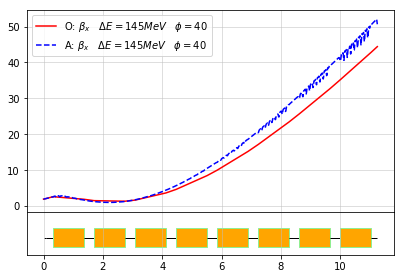

In [9]:
"""
H_max=0.002
H_min=0.0002

! ACC1  1module*8cavities
FILE_EFieLD(2)='tesla4cav.dat'
Nue(2)=1.3
MaxE(2) = 46.432162414988746
Phi(2) = -40
C_pos(2)=4.04005
FILE_EFieLD(3)='tesla4cav.dat'
Nue(3)=1.3
MaxE(3) = 46.432162414988746
Phi(3) = -40
"""
p_array_init = load_particle_array("astra_data/init_beam.npz")
tau = p_array_init.tau()
print("d sigma = ",  (np.max(tau) - np.min(tau))*1e6, " um")

p_array_end = load_particle_array("astra_data/ast_end_s2e_real_h002_40d.npz")
print("ASTRA: start energy = ", p_array_init.E*1000, " MeV")
print("ASTRA: end energy = ", p_array_end.E*1000, " MeV")
dE = p_array_end.E - p_array_init.E
print("ASTRA: dE = ", dE, " MeV")


phi1 = 40 
V1=dE/np.cos(phi1*pi/180)/8

C_A1_1_1_I1.v = V1; C_A1_1_1_I1.phi = phi1
C_A1_1_2_I1.v = V1; C_A1_1_2_I1.phi = phi1
C_A1_1_3_I1.v = V1; C_A1_1_3_I1.phi = phi1
C_A1_1_4_I1.v = V1; C_A1_1_4_I1.phi = phi1
C_A1_1_5_I1.v = V1; C_A1_1_5_I1.phi = phi1
C_A1_1_6_I1.v = V1; C_A1_1_6_I1.phi = phi1
C_A1_1_7_I1.v = V1; C_A1_1_7_I1.phi = phi1
C_A1_1_8_I1.v = V1; C_A1_1_8_I1.phi = phi1

method = MethodTM()
method.global_method = SecondTM
lat = MagneticLattice(cell, start=start_sim, stop=stop_A1, method=method)

navi = Navigator(lat)

# deep copy of the initial beam distribution 
p_array = deepcopy(p_array_init)
start = time.time()
print("OCELOT: start energy = ", p_array.E*1000, " MeV")
tws_track, p_array = track(lat, p_array, navi)
print()
print("OCELOT: end energy = ", p_array.E*1000, " MeV")
compare_beams(p_array, p_array_end,  legend_beam1="ocelot", legend_beam2="astra", 
              figsize=(10, 8))

print("OCELOT: D_sigma = ", (np.max(p_array.tau()) - np.min(p_array.tau()))*1e6, " um")
print("ASTRA: D_sigma = ", (np.max(p_array_end.tau()) - np.min(p_array_end.tau()))*1e6, " um")
#tws_astra = emittance_analysis(fileprefix="Exfel", s_offset = 0, trace_space=True)

fig, ax_xy = plot_API(lat, legend=False)
s_oc = [tw.s for tw in tws_track]
bx_oc = [tw.beta_x for tw in tws_track]

s_as3, bx_as3 = np.loadtxt("astra_data/phase_s2e_real_as_h002_40d.txt")

ax_xy.plot(s_oc, bx_oc, "r-",  label= "O:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=40$")
ax_xy.plot(s_as3, bx_as3, "b--", label= "A:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=40$")

ax_xy.legend()
plt.show()

### Full beam. Phase -40 deg.

d sigma =  8312.407209544674  um
ASTRA: start energy =  6.5573408179118235  MeV
ASTRA: end energy =  154.0908472941928  MeV
ASTRA: dE =  0.147533506476281  MeV
OCELOT: start energy =  6.5573408179118235  MeV
z = 11.2484 / 11.248400000000004 : applied:  applied:  
OCELOT: end energy =  154.0908472941929  MeV
OCELOT: D_sigma =  8569.849178527109  um
ASTRA: D_sigma =  8548.747345989656  um


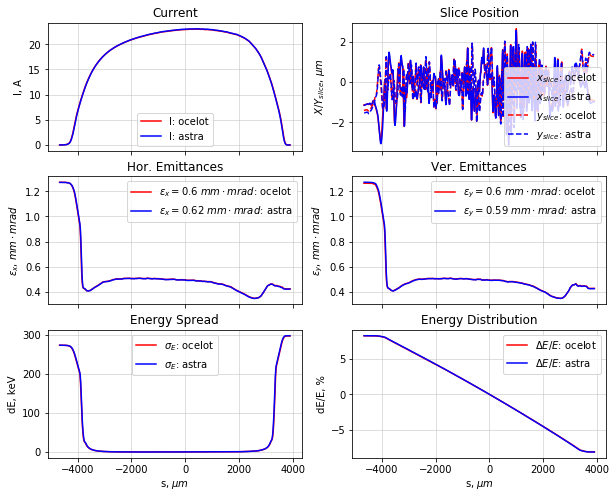

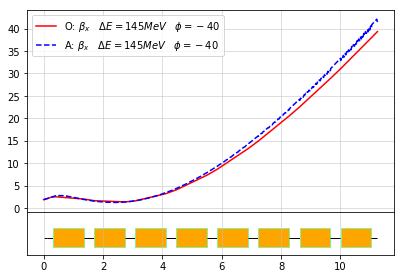

In [10]:
"""
H_max=0.002
H_min=0.0002
! ACC1  1module*8cavities
FILE_EFieLD(2)='tesla4cav_ideal.dat'
Nue(2)=1.3
MaxE(2) = 46.432162414988746
Phi(2) = 40
C_pos(2)=4.04005
FILE_EFieLD(3)='tesla4cav_ideal.dat'
Nue(3)=1.3
MaxE(3) = 46.432162414988746
Phi(3) = 40
"""
p_array_init = load_particle_array("astra_data/init_beam.npz")
tau = p_array_init.tau()
print("d sigma = ",  (np.max(tau) - np.min(tau))*1e6, " um")

p_array_end = load_particle_array("astra_data/ast_end_s2e_ideal_h002_m40d.npz")
print("ASTRA: start energy = ", p_array_init.E*1000, " MeV")
print("ASTRA: end energy = ", p_array_end.E*1000, " MeV")
dE = p_array_end.E - p_array_init.E
print("ASTRA: dE = ", dE, " MeV")


phi1 = -40 
V1=dE/np.cos(phi1*pi/180)/8

C_A1_1_1_I1.v = V1; C_A1_1_1_I1.phi = phi1
C_A1_1_2_I1.v = V1; C_A1_1_2_I1.phi = phi1
C_A1_1_3_I1.v = V1; C_A1_1_3_I1.phi = phi1
C_A1_1_4_I1.v = V1; C_A1_1_4_I1.phi = phi1
C_A1_1_5_I1.v = V1; C_A1_1_5_I1.phi = phi1
C_A1_1_6_I1.v = V1; C_A1_1_6_I1.phi = phi1
C_A1_1_7_I1.v = V1; C_A1_1_7_I1.phi = phi1
C_A1_1_8_I1.v = V1; C_A1_1_8_I1.phi = phi1

method = MethodTM()
method.global_method = SecondTM
lat = MagneticLattice(cell, start=start_sim, stop=stop_A1, method=method)

navi = Navigator(lat)

# deep copy of the initial beam distribution 
p_array = deepcopy(p_array_init)
start = time.time()
print("OCELOT: start energy = ", p_array.E*1000, " MeV")
tws_track, p_array = track(lat, p_array, navi)
print()
print("OCELOT: end energy = ", p_array.E*1000, " MeV")
compare_beams(p_array, p_array_end,  legend_beam1="ocelot", legend_beam2="astra", 
              figsize=(10, 8))

print("OCELOT: D_sigma = ", (np.max(p_array.tau()) - np.min(p_array.tau()))*1e6, " um")
print("ASTRA: D_sigma = ", (np.max(p_array_end.tau()) - np.min(p_array_end.tau()))*1e6, " um")
#tws_astra = emittance_analysis(fileprefix="Exfel", s_offset = 0, trace_space=True)

fig, ax_xy = plot_API(lat, legend=False)
s_oc = [tw.s for tw in tws_track]
bx_oc = [tw.beta_x for tw in tws_track]

s_as3, bx_as3 = np.loadtxt("astra_data/phase_s2e_ideal_as_h002_m40d.txt")

ax_xy.plot(s_oc, bx_oc, "r-",  label= "O:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=-40$")
ax_xy.plot(s_as3, bx_as3, "b--", label= "A:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=-40$")

ax_xy.legend()
plt.show()

### Full beam. Phase 0 deg.

d sigma =  8312.407209544674  um
ASTRA: start energy =  6.5573408179118235  MeV
ASTRA: end energy =  154.17084685452772  MeV
ASTRA: dE =  0.1476135060366159  MeV
OCELOT: start energy =  6.5573408179118235  MeV
z = 11.2484 / 11.248400000000004 : applied:  applied:  
OCELOT: end energy =  154.1708468545279  MeV
OCELOT: D_sigma =  8336.357627053738  um
ASTRA: D_sigma =  8319.946369282055  um


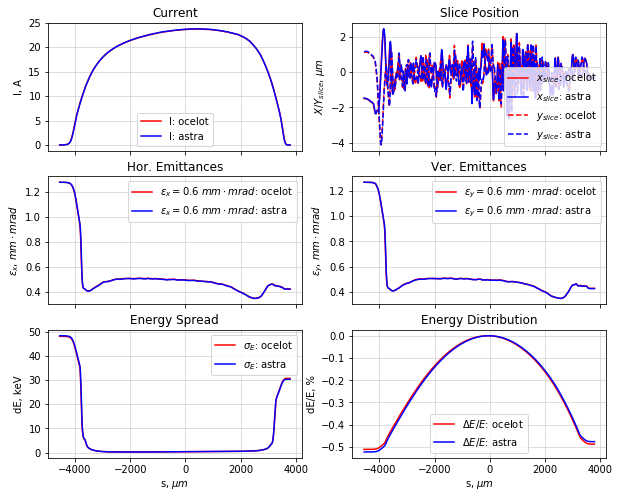

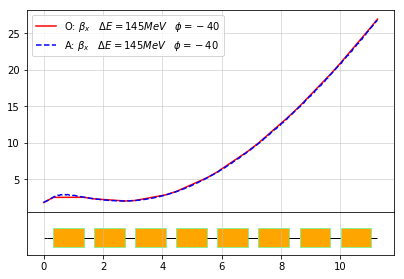

In [11]:
"""
H_max=0.002
H_min=0.0002
! ACC1  1module*8cavities
FILE_EFieLD(2)='tesla4cav_ideal.dat'
Nue(2)=1.3
MaxE(2) = 35.5691
Phi(2) = 0
C_pos(2)=4.04005
FILE_EFieLD(3)='tesla4cav_ideal.dat'
Nue(3)=1.3
MaxE(3) = 35.5691
Phi(3) = 0
"""
p_array_init = load_particle_array("astra_data/init_beam.npz")
tau = p_array_init.tau()
print("d sigma = ",  (np.max(tau) - np.min(tau))*1e6, " um")

p_array_end = load_particle_array("astra_data/ast_end_s2e_ideal_h002_0d.npz")
print("ASTRA: start energy = ", p_array_init.E*1000, " MeV")
print("ASTRA: end energy = ", p_array_end.E*1000, " MeV")
dE = p_array_end.E - p_array_init.E
print("ASTRA: dE = ", dE, " MeV")


phi1 = 0 
V1=dE/np.cos(phi1*pi/180)/8

C_A1_1_1_I1.v = V1; C_A1_1_1_I1.phi = phi1
C_A1_1_2_I1.v = V1; C_A1_1_2_I1.phi = phi1
C_A1_1_3_I1.v = V1; C_A1_1_3_I1.phi = phi1
C_A1_1_4_I1.v = V1; C_A1_1_4_I1.phi = phi1
C_A1_1_5_I1.v = V1; C_A1_1_5_I1.phi = phi1
C_A1_1_6_I1.v = V1; C_A1_1_6_I1.phi = phi1
C_A1_1_7_I1.v = V1; C_A1_1_7_I1.phi = phi1
C_A1_1_8_I1.v = V1; C_A1_1_8_I1.phi = phi1

method = MethodTM()
method.global_method = SecondTM
lat = MagneticLattice(cell, start=start_sim, stop=stop_A1, method=method)

navi = Navigator(lat)

# deep copy of the initial beam distribution 
p_array = deepcopy(p_array_init)
start = time.time()
print("OCELOT: start energy = ", p_array.E*1000, " MeV")
tws_track, p_array = track(lat, p_array, navi)
print()
print("OCELOT: end energy = ", p_array.E*1000, " MeV")
compare_beams(p_array, p_array_end,  legend_beam1="ocelot", legend_beam2="astra", 
              figsize=(10, 8))

print("OCELOT: D_sigma = ", (np.max(p_array.tau()) - np.min(p_array.tau()))*1e6, " um")
print("ASTRA: D_sigma = ", (np.max(p_array_end.tau()) - np.min(p_array_end.tau()))*1e6, " um")
#tws_astra = emittance_analysis(fileprefix="Exfel", s_offset = 0, trace_space=True)

fig, ax_xy = plot_API(lat, legend=False)
s_oc = [tw.s for tw in tws_track]
bx_oc = [tw.beta_x for tw in tws_track]

s_as3, bx_as3 = np.loadtxt("astra_data/phase_s2e_ideal_as_h002_0d.txt")

ax_xy.plot(s_oc, bx_oc, "r-",  label= "O:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=-40$")
ax_xy.plot(s_as3, bx_as3, "b--", label= "A:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=-40$")

ax_xy.legend()
plt.show()

### Full beam. Phase -40 deg. Real RF field. Small Step.

d sigma =  8312.407209544674  um
ASTRA: start energy =  6.5573408179118235  MeV
ASTRA: end energy =  160.17081513135358  MeV
ASTRA: dE =  0.15361347431344177  MeV
OCELOT: start energy =  6.5573408179118235  MeV
z = 11.2484 / 11.248400000000004 : applied:  applied:  
OCELOT: end energy =  160.17081513135372  MeV
OCELOT: D_sigma =  8560.188737151786  um
ASTRA: D_sigma =  8497.243536967033  um


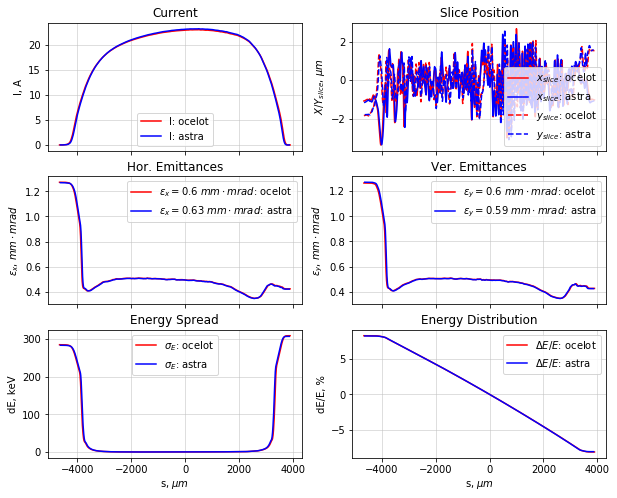

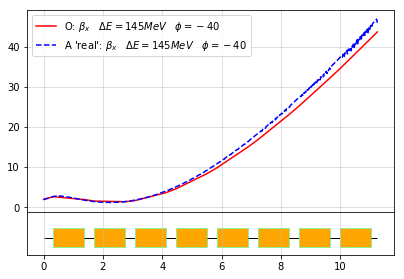

In [12]:
"""
H_max=0.002
H_min=0.0002
! ACC1  1module*8cavities
FILE_EFieLD(2)='tesla4cav.dat'
Nue(2)=1.3
MaxE(2) = 46.432162414988746
Phi(2) = 40
C_pos(2)=4.04005
FILE_EFieLD(3)='tesla4cav.dat'
Nue(3)=1.3
MaxE(3) = 46.432162414988746
Phi(3) = 40
"""
p_array_init = load_particle_array("astra_data/init_beam.npz")
tau = p_array_init.tau()
print("d sigma = ",  (np.max(tau) - np.min(tau))*1e6, " um")

p_array_end = load_particle_array("astra_data/ast_end_s2e_real_h002_m40d.npz")
print("ASTRA: start energy = ", p_array_init.E*1000, " MeV")
print("ASTRA: end energy = ", p_array_end.E*1000, " MeV")
dE = p_array_end.E - p_array_init.E
print("ASTRA: dE = ", dE, " MeV")


phi1 = -40
V1=dE/np.cos(phi1*pi/180)/8

C_A1_1_1_I1.v = V1; C_A1_1_1_I1.phi = phi1
C_A1_1_2_I1.v = V1; C_A1_1_2_I1.phi = phi1
C_A1_1_3_I1.v = V1; C_A1_1_3_I1.phi = phi1
C_A1_1_4_I1.v = V1; C_A1_1_4_I1.phi = phi1
C_A1_1_5_I1.v = V1; C_A1_1_5_I1.phi = phi1
C_A1_1_6_I1.v = V1; C_A1_1_6_I1.phi = phi1
C_A1_1_7_I1.v = V1; C_A1_1_7_I1.phi = phi1
C_A1_1_8_I1.v = V1; C_A1_1_8_I1.phi = phi1

method = MethodTM()
method.global_method = SecondTM
lat = MagneticLattice(cell, start=start_sim, stop=stop_A1, method=method)

navi = Navigator(lat)

# deep copy of the initial beam distribution 
p_array = deepcopy(p_array_init)
start = time.time()
print("OCELOT: start energy = ", p_array.E*1000, " MeV")
tws_track, p_array = track(lat, p_array, navi)
print()
print("OCELOT: end energy = ", p_array.E*1000, " MeV")
compare_beams(p_array, p_array_end,  legend_beam1="ocelot", legend_beam2="astra", 
              figsize=(10, 8))

print("OCELOT: D_sigma = ", (np.max(p_array.tau()) - np.min(p_array.tau()))*1e6, " um")
print("ASTRA: D_sigma = ", (np.max(p_array_end.tau()) - np.min(p_array_end.tau()))*1e6, " um")
#tws_astra = emittance_analysis(fileprefix="Exfel", s_offset = 0, trace_space=True)

fig, ax_xy = plot_API(lat, legend=False)
s_oc = [tw.s for tw in tws_track]
bx_oc = [tw.beta_x for tw in tws_track]

s_as3, bx_as3 = np.loadtxt("astra_data/phase_s2e_real_as_h002_m40d.txt")

ax_xy.plot(s_oc, bx_oc, "r-",  label= "O:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=-40$")
ax_xy.plot(s_as3, bx_as3, "b--", label= "A 'real':" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=-40$")

ax_xy.legend()
plt.show()

## ZERO GAIN. Full beam

d sigma =  8312.407209544674  um
ASTRA: start energy =  6.5573408179118235  MeV
ASTRA: end energy =  6.5573408179118235  MeV
ASTRA: dE =  0.0  MeV
OCELOT: start energy =  6.5573408179118235  MeV
z = 11.2484 / 11.248400000000004 : applied:  applied:  
OCELOT: end energy =  6.5573408179118235  MeV
OCELOT: D_sigma =  9506.167379078166  um
ASTRA: D_sigma =  9507.050087234958  um


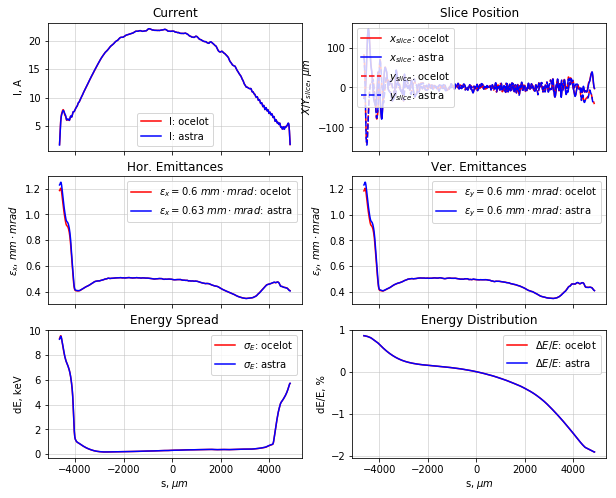

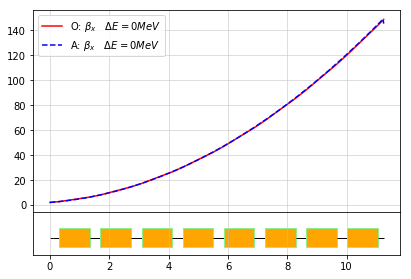

In [13]:
"""
H_max=0.04
H_min=0.0002
"""
p_array_init = load_particle_array("astra_data/init_beam.npz")
tau = p_array_init.tau()
print("d sigma = ",  (np.max(tau) - np.min(tau))*1e6, " um")

p_array_end = load_particle_array("astra_data/ast_end_zero.npz")
print("ASTRA: start energy = ", p_array_init.E*1000, " MeV")
print("ASTRA: end energy = ", p_array_end.E*1000, " MeV")
dE = p_array_end.E - p_array_init.E
print("ASTRA: dE = ", dE, " MeV")


phi1 = 0
V1=dE/np.cos(phi1*pi/180)/8

C_A1_1_1_I1.v = V1; C_A1_1_1_I1.phi = phi1
C_A1_1_2_I1.v = V1; C_A1_1_2_I1.phi = phi1
C_A1_1_3_I1.v = V1; C_A1_1_3_I1.phi = phi1
C_A1_1_4_I1.v = V1; C_A1_1_4_I1.phi = phi1
C_A1_1_5_I1.v = V1; C_A1_1_5_I1.phi = phi1
C_A1_1_6_I1.v = V1; C_A1_1_6_I1.phi = phi1
C_A1_1_7_I1.v = V1; C_A1_1_7_I1.phi = phi1
C_A1_1_8_I1.v = V1; C_A1_1_8_I1.phi = phi1

method = MethodTM()
method.global_method = SecondTM
lat = MagneticLattice(cell, start=start_sim, stop=stop_A1, method=method)

navi = Navigator(lat)

# deep copy of the initial beam distribution 
p_array = deepcopy(p_array_init)
start = time.time()
print("OCELOT: start energy = ", p_array.E*1000, " MeV")
tws_track, p_array = track(lat, p_array, navi)
print()
print("OCELOT: end energy = ", p_array.E*1000, " MeV")
compare_beams(p_array, p_array_end,  legend_beam1="ocelot", legend_beam2="astra", 
              figsize=(10, 8))

print("OCELOT: D_sigma = ", (np.max(p_array.tau()) - np.min(p_array.tau()))*1e6, " um")
print("ASTRA: D_sigma = ", (np.max(p_array_end.tau()) - np.min(p_array_end.tau()))*1e6, " um")
#tws_astra = emittance_analysis(fileprefix="Exfel", s_offset = 0, trace_space=True)

fig, ax_xy = plot_API(lat, legend=False)
s_oc = [tw.s for tw in tws_track]
bx_oc = [tw.beta_x for tw in tws_track]

s_as3, bx_as3 = np.loadtxt("astra_data/phase_zero_as.txt")

ax_xy.plot(s_oc, bx_oc, "r-",  label= "O:" + r" $\beta_{x} \quad \Delta E=0 MeV$")
ax_xy.plot(s_as3, bx_as3, "b--", label= "A:" + r" $\beta_{x} \quad \Delta E=0 MeV$")

ax_xy.legend()
plt.show()

## S2E. Ideal RF field.

d sigma =  8312.407209544674  um
ASTRA: start energy =  6.5573408179118235  MeV
ASTRA: end energy =  152.80085444735658  MeV
ASTRA: dE =  0.14624351362944477  MeV
OCELOT: start energy =  6.5573408179118235  MeV
z = 11.2484 / 11.248400000000004 : applied:  applied:  
OCELOT: end energy =  152.80664239253974  MeV
OCELOT: D_sigma =  8221.884644238662  um
ASTRA: D_sigma =  8211.44760339131  um


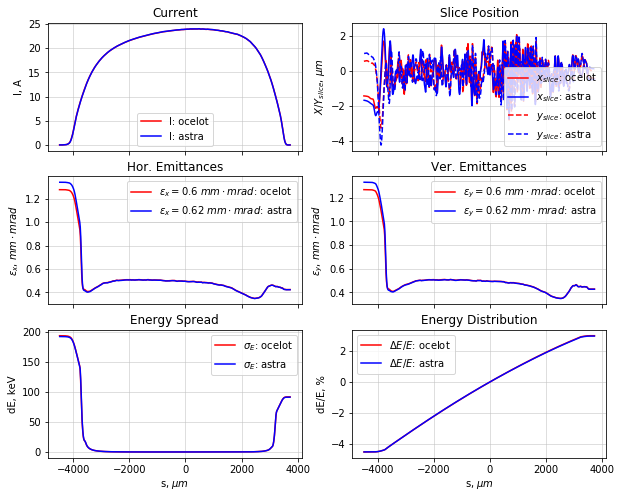

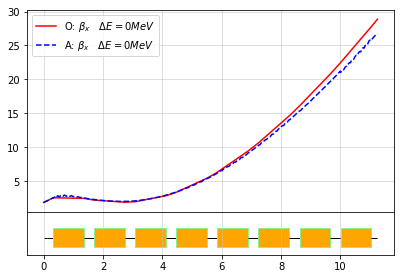

In [14]:
"""
H_max=0.04
H_min=0.0002
"""
p_array_init = load_particle_array("astra_data/init_beam.npz")
tau = p_array_init.tau()
print("d sigma = ",  (np.max(tau) - np.min(tau))*1e6, " um")

p_array_end = load_particle_array("astra_data/ast_end_s2e_ideal.npz")
print("ASTRA: start energy = ", p_array_init.E*1000, " MeV")
print("ASTRA: end energy = ", p_array_end.E*1000, " MeV")
dE = p_array_end.E - p_array_init.E
print("ASTRA: dE = ", dE, " MeV")


phi1 = 21.796390202384082 
V1= 19.688724956445860*1e-3
#V1=dE/np.cos(phi1*pi/180)/8

C_A1_1_1_I1.v = V1; C_A1_1_1_I1.phi = phi1
C_A1_1_2_I1.v = V1; C_A1_1_2_I1.phi = phi1
C_A1_1_3_I1.v = V1; C_A1_1_3_I1.phi = phi1
C_A1_1_4_I1.v = V1; C_A1_1_4_I1.phi = phi1
C_A1_1_5_I1.v = V1; C_A1_1_5_I1.phi = phi1
C_A1_1_6_I1.v = V1; C_A1_1_6_I1.phi = phi1
C_A1_1_7_I1.v = V1; C_A1_1_7_I1.phi = phi1
C_A1_1_8_I1.v = V1; C_A1_1_8_I1.phi = phi1

method = MethodTM()
method.global_method = SecondTM
lat = MagneticLattice(cell, start=start_sim, stop=stop_A1, method=method)

navi = Navigator(lat)

# deep copy of the initial beam distribution 
p_array = deepcopy(p_array_init)
start = time.time()
print("OCELOT: start energy = ", p_array.E*1000, " MeV")
tws_track, p_array = track(lat, p_array, navi)
print()
print("OCELOT: end energy = ", p_array.E*1000, " MeV")
compare_beams(p_array, p_array_end,  legend_beam1="ocelot", legend_beam2="astra", 
              figsize=(10, 8))

print("OCELOT: D_sigma = ", (np.max(p_array.tau()) - np.min(p_array.tau()))*1e6, " um")
print("ASTRA: D_sigma = ", (np.max(p_array_end.tau()) - np.min(p_array_end.tau()))*1e6, " um")
#tws_astra = emittance_analysis(fileprefix="Exfel", s_offset = 0, trace_space=True)

fig, ax_xy = plot_API(lat, legend=False)
s_oc = [tw.s for tw in tws_track]
bx_oc = [tw.beta_x for tw in tws_track]

s_as3, bx_as3 = np.loadtxt("astra_data/phase_s2e_ideal_as.txt")

ax_xy.plot(s_oc, bx_oc, "r-",  label= "O:" + r" $\beta_{x} \quad \Delta E=0 MeV$")
ax_xy.plot(s_as3, bx_as3, "b--", label= "A:" + r" $\beta_{x} \quad \Delta E=0 MeV$")

ax_xy.legend()
plt.show()

## S2E. "Real" RF field

d sigma =  8312.407209544674  um
ASTRA: start energy =  6.5573408179118235  MeV
ASTRA: end energy =  152.8208543355332  MeV
ASTRA: end mean energy =  152.31781525933246  MeV
ASTRA: dE =  0.14626351351762137  MeV
OCELOT: start energy =  6.5573408179118235  MeV
z = 11.2484 / 11.248400000000004 : applied:  applied:  
OCELOT: end energy =  152.80664239253974  MeV
OCELOT: end mean energy =  152.29879773547196  MeV
OCELOT: D_sigma =  8221.884644238662  um
ASTRA: D_sigma =  8177.647378519216  um


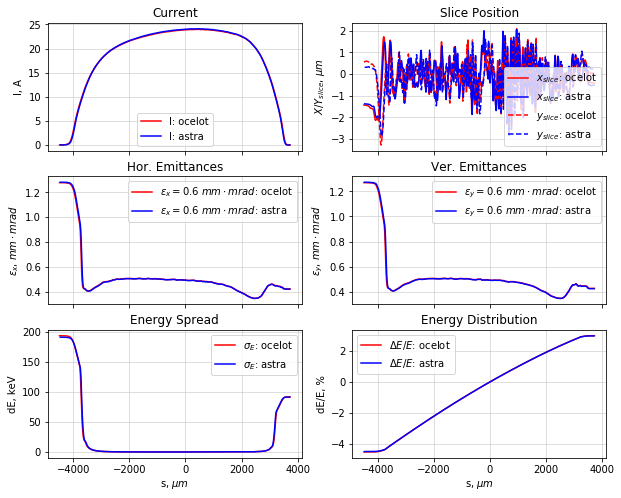

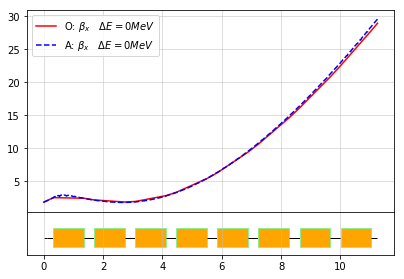

In [15]:
"""
H_max=0.04
H_min=0.0002
! ACC1  1module*8cavities
FILE_EFieLD(2)='tesla4cav.dat'
Nue(2)=1.3
MaxE(2) = 36.4917990295232
Phi(2) = -20.45
C_pos(2)=4.04005
FILE_EFieLD(3)='tesla4cav.dat'
Nue(3)=1.3
MaxE(3) = 36.4917990295232
Phi(3) = -20.45
"""
p_array_init = load_particle_array("astra_data/init_beam.npz")
tau = p_array_init.tau()
print("d sigma = ",  (np.max(tau) - np.min(tau))*1e6, " um")

p_array_end = load_particle_array("astra_data/ast_end_s2e_real.npz")
print("ASTRA: start energy = ", p_array_init.E*1000, " MeV")
print("ASTRA: end energy = ", p_array_end.E*1000, " MeV")
print("ASTRA: end mean energy = ", (1 + np.mean(p_array_end.p()))*p_array_end.E*1000, " MeV")


dE = p_array_end.E - p_array_init.E
print("ASTRA: dE = ", dE, " MeV")


phi1 = 21.796390202384082 
V1= 19.688724956445860*1e-3
#V1=dE/np.cos(phi1*pi/180)/8

C_A1_1_1_I1.v = V1; C_A1_1_1_I1.phi = phi1
C_A1_1_2_I1.v = V1; C_A1_1_2_I1.phi = phi1
C_A1_1_3_I1.v = V1; C_A1_1_3_I1.phi = phi1
C_A1_1_4_I1.v = V1; C_A1_1_4_I1.phi = phi1
C_A1_1_5_I1.v = V1; C_A1_1_5_I1.phi = phi1
C_A1_1_6_I1.v = V1; C_A1_1_6_I1.phi = phi1
C_A1_1_7_I1.v = V1; C_A1_1_7_I1.phi = phi1
C_A1_1_8_I1.v = V1; C_A1_1_8_I1.phi = phi1

method = MethodTM()
method.global_method = SecondTM
lat = MagneticLattice(cell, start=start_sim, stop=stop_A1, method=method)

navi = Navigator(lat)

# deep copy of the initial beam distribution 
p_array = deepcopy(p_array_init)
start = time.time()
print("OCELOT: start energy = ", p_array.E*1000, " MeV")
tws_track, p_array = track(lat, p_array, navi)
print()
print("OCELOT: end energy = ", p_array.E*1000, " MeV")
print("OCELOT: end mean energy = ", (1 + np.mean(p_array.p()))*p_array.E*1000, " MeV")


compare_beams(p_array, p_array_end,  legend_beam1="ocelot", legend_beam2="astra", 
              figsize=(10, 8))

print("OCELOT: D_sigma = ", (np.max(p_array.tau()) - np.min(p_array.tau()))*1e6, " um")
print("ASTRA: D_sigma = ", (np.max(p_array_end.tau()) - np.min(p_array_end.tau()))*1e6, " um")
#tws_astra = emittance_analysis(fileprefix="Exfel", s_offset = 0, trace_space=True)

fig, ax_xy = plot_API(lat, legend=False)
s_oc = [tw.s for tw in tws_track]
bx_oc = [tw.beta_x for tw in tws_track]

s_as3, bx_as3 = np.loadtxt("astra_data/phase_s2e_real_as.txt")

ax_xy.plot(s_oc, bx_oc, "r-",  label= "O:" + r" $\beta_{x} \quad \Delta E=0 MeV$")
ax_xy.plot(s_as3, bx_as3, "b--", label= "A:" + r" $\beta_{x} \quad \Delta E=0 MeV$")

ax_xy.legend()
plt.show()

## S2E. "Real" RF field. Small step.

d sigma =  8312.407209544674  um
ASTRA: start energy =  6.5573408179118235  MeV
ASTRA: end energy =  154.14084701934866  MeV
ASTRA: end mean energy =  153.6522364832065  MeV
ASTRA: dE =  0.14758350620143684  MeV
OCELOT: start energy =  6.5573408179118235  MeV
z = 11.2484 / 11.248400000000004 : applied:  applied:  
OCELOT: end energy =  154.14084701934877  MeV
OCELOT: end mean energy =  153.6479754616774  MeV
OCELOT: D_sigma =  8230.558755432188  um
ASTRA: D_sigma =  8178.046490586365  um


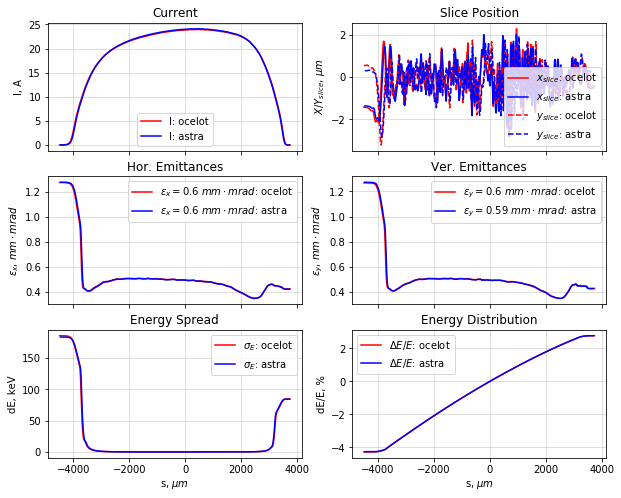

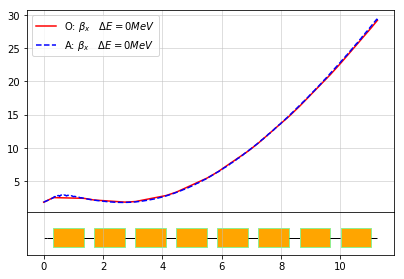

In [16]:
"""
H_max=0.004
H_min=0.0002
! ACC1  1module*8cavities
FILE_EFieLD(2)='tesla4cav.dat'
Nue(2)=1.3
MaxE(2) = 36.4917990295232
Phi(2) = -20.45
C_pos(2)=4.04005
FILE_EFieLD(3)='tesla4cav.dat'
Nue(3)=1.3
MaxE(3) = 36.4917990295232
Phi(3) = -20.45
"""
p_array_init = load_particle_array("astra_data/init_beam.npz")
tau = p_array_init.tau()
print("d sigma = ",  (np.max(tau) - np.min(tau))*1e6, " um")

p_array_end = load_particle_array("astra_data/ast_end_s2e_real_h004.npz")
print("ASTRA: start energy = ", p_array_init.E*1000, " MeV")
print("ASTRA: end energy = ", p_array_end.E*1000, " MeV")
print("ASTRA: end mean energy = ", (1 + np.mean(p_array_end.p()))*p_array_end.E*1000, " MeV")


dE = p_array_end.E - p_array_init.E
print("ASTRA: dE = ", dE, " MeV")


phi1 = 20.45#21.796390202384082 
#V1= 19.688724956445860*1e-3
V1=dE/np.cos(phi1*pi/180)/8

C_A1_1_1_I1.v = V1; C_A1_1_1_I1.phi = phi1
C_A1_1_2_I1.v = V1; C_A1_1_2_I1.phi = phi1
C_A1_1_3_I1.v = V1; C_A1_1_3_I1.phi = phi1
C_A1_1_4_I1.v = V1; C_A1_1_4_I1.phi = phi1
C_A1_1_5_I1.v = V1; C_A1_1_5_I1.phi = phi1
C_A1_1_6_I1.v = V1; C_A1_1_6_I1.phi = phi1
C_A1_1_7_I1.v = V1; C_A1_1_7_I1.phi = phi1
C_A1_1_8_I1.v = V1; C_A1_1_8_I1.phi = phi1

method = MethodTM()
method.global_method = SecondTM
lat = MagneticLattice(cell, start=start_sim, stop=stop_A1, method=method)

navi = Navigator(lat)

# deep copy of the initial beam distribution 
p_array = deepcopy(p_array_init)
start = time.time()
print("OCELOT: start energy = ", p_array.E*1000, " MeV")
tws_track, p_array = track(lat, p_array, navi)
print()
print("OCELOT: end energy = ", p_array.E*1000, " MeV")
print("OCELOT: end mean energy = ", (1 + np.mean(p_array.p()))*p_array.E*1000, " MeV")


compare_beams(p_array, p_array_end,  legend_beam1="ocelot", legend_beam2="astra", 
              figsize=(10, 8))

print("OCELOT: D_sigma = ", (np.max(p_array.tau()) - np.min(p_array.tau()))*1e6, " um")
print("ASTRA: D_sigma = ", (np.max(p_array_end.tau()) - np.min(p_array_end.tau()))*1e6, " um")
#tws_astra = emittance_analysis(fileprefix="Exfel", s_offset = 0, trace_space=True)

fig, ax_xy = plot_API(lat, legend=False)
s_oc = [tw.s for tw in tws_track]
bx_oc = [tw.beta_x for tw in tws_track]

s_as3, bx_as3 = np.loadtxt("astra_data/phase_s2e_real_h004_as.txt")

ax_xy.plot(s_oc, bx_oc, "r-",  label= "O:" + r" $\beta_{x} \quad \Delta E=0 MeV$")
ax_xy.plot(s_as3, bx_as3, "b--", label= "A:" + r" $\beta_{x} \quad \Delta E=0 MeV$")

ax_xy.legend()
plt.show()

## S2E with SC. Small step.

d sigma =  8312.407209544674  um
ASTRA: start energy =  6.5573408179118235  MeV
ASTRA: end energy =  154.14084701934866  MeV
ASTRA: end mean energy =  153.65185572709493  MeV
ASTRA: dE =  0.14758350620143684  MeV
OCELOT: start energy =  6.5573408179118235  MeV
z = 11.2484 / 11.248400000000004 : applied: SpaceChargeSpaceChargee
OCELOT: end energy =  154.14084701934866  MeV
OCELOT: end mean energy =  153.64827366010823  MeV
OCELOT: D_sigma =  8231.795543276434  um
ASTRA: D_sigma =  8179.846500898588  um


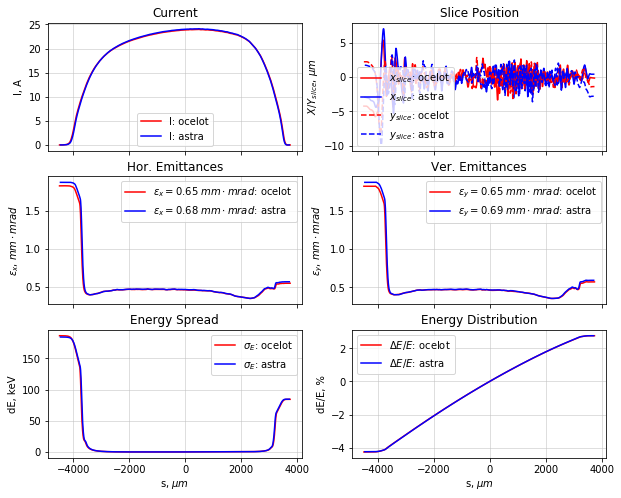

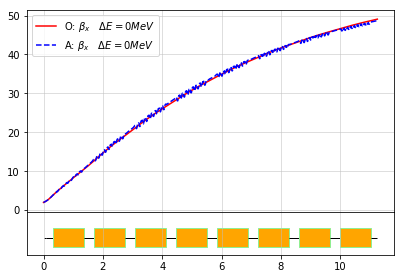

In [17]:
"""
H_max=0.004
H_min=0.0002
! ACC1  1module*8cavities
FILE_EFieLD(2)='tesla4cav.dat'
MaxE(2) = 36.4917990295232
Phi(2) = -20.45
FILE_EFieLD(3)='tesla4cav.dat'
MaxE(3) = 36.4917990295232
Phi(3) = -20.45
"""
p_array_init = load_particle_array("astra_data/init_beam.npz")
tau = p_array_init.tau()
print("d sigma = ",  (np.max(tau) - np.min(tau))*1e6, " um")

p_array_end = load_particle_array("astra_data/ast_end_s2e_real_sc.npz")
print("ASTRA: start energy = ", p_array_init.E*1000, " MeV")
print("ASTRA: end energy = ", p_array_end.E*1000, " MeV")
print("ASTRA: end mean energy = ", (1 + np.mean(p_array_end.p()))*p_array_end.E*1000, " MeV")


dE = p_array_end.E - p_array_init.E
print("ASTRA: dE = ", dE, " MeV")


phi1 = 20.45#21.796390202384082 
#V1= 19.688724956445860*1e-3
V1=dE/np.cos(phi1*pi/180)/8
#phi1=18.7268
#V1=18.50662e-3/np.cos(phi1*pi/180)
C_A1_1_1_I1.v = V1; C_A1_1_1_I1.phi = phi1
C_A1_1_2_I1.v = V1; C_A1_1_2_I1.phi = phi1
C_A1_1_3_I1.v = V1; C_A1_1_3_I1.phi = phi1
C_A1_1_4_I1.v = V1; C_A1_1_4_I1.phi = phi1
C_A1_1_5_I1.v = V1; C_A1_1_5_I1.phi = phi1
C_A1_1_6_I1.v = V1; C_A1_1_6_I1.phi = phi1
C_A1_1_7_I1.v = V1; C_A1_1_7_I1.phi = phi1
C_A1_1_8_I1.v = V1; C_A1_1_8_I1.phi = phi1

method = MethodTM()
method.global_method = SecondTM
lat = MagneticLattice(cell, start=start_sim, stop=stop_A1, method=method)

sc1 = SpaceCharge()
sc1.nmesh_xyz = [63, 63, 63]
sc1.step = 1

sc5 = SpaceCharge()
sc5.nmesh_xyz = [63, 63, 63]
sc5.step = 5

navi = Navigator(lat)
navi.unit_step = 0.02
navi.add_physics_proc(sc1, lat.sequence[0], C_A1_1_2_I1)
navi.add_physics_proc(sc5, C_A1_1_2_I1, lat.sequence[-1])

# deep copy of the initial beam distribution 
p_array = deepcopy(p_array_init)
start = time.time()
print("OCELOT: start energy = ", p_array.E*1000, " MeV")
tws_track, p_array = track(lat, p_array, navi)
print()
print("OCELOT: end energy = ", p_array.E*1000, " MeV")
print("OCELOT: end mean energy = ", (1 + np.mean(p_array.p()))*p_array.E*1000, " MeV")


compare_beams(p_array, p_array_end,  legend_beam1="ocelot", legend_beam2="astra", 
              figsize=(10, 8))

print("OCELOT: D_sigma = ", (np.max(p_array.tau()) - np.min(p_array.tau()))*1e6, " um")
print("ASTRA: D_sigma = ", (np.max(p_array_end.tau()) - np.min(p_array_end.tau()))*1e6, " um")
#tws_astra = emittance_analysis(fileprefix="Exfel", s_offset = 0, trace_space=True)

fig, ax_xy = plot_API(lat, legend=False)
s_oc = [tw.s for tw in tws_track]
bx_oc = [tw.beta_x for tw in tws_track]

s_as3, bx_as3 = np.loadtxt("astra_data/phase_s2e_real_sc_as.txt")

ax_xy.plot(s_oc, bx_oc, "r-",  label= "O:" + r" $\beta_{x} \quad \Delta E=0 MeV$")
ax_xy.plot(s_as3, bx_as3, "b--", label= "A:" + r" $\beta_{x} \quad \Delta E=0 MeV$")

ax_xy.legend()
plt.show()

# On crest. 
## with SC. 

d sigma =  8312.407209544674  um
ASTRA: start energy =  6.5573408179118235  MeV
ASTRA: end energy =  160.12081538588993  MeV
ASTRA: end mean energy =  159.89463298043952  MeV
ASTRA: dE =  153.56347456797812  MeV
OCELOT: start energy =  6.5573408179118235  MeV
z = 11.2484 / 11.248400000000004 : applied: SpaceChargeSpaceChargeee
OCELOT: end energy =  160.12081538589123  MeV
OCELOT: end mean energy =  159.8937657068042  MeV
OCELOT: D_sigma =  8337.703233582379  um
ASTRA: D_sigma =  8295.14286285319  um


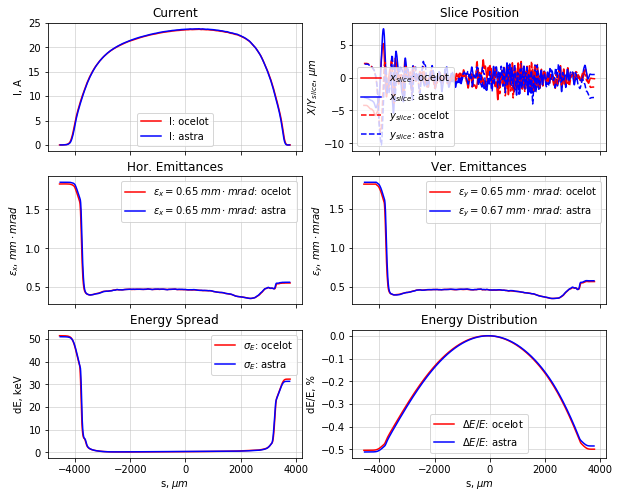

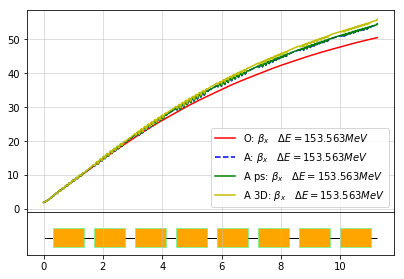

In [18]:
"""
H_max=0.002
H_min=0.0002
! ACC1  1module*8cavities
FILE_EFieLD(2)='tesla4cav.dat'
Nue(2)=1.3
MaxE(2) = 35.5691
Phi(2) = 0
C_pos(2)=4.04005
FILE_EFieLD(3)='tesla4cav.dat'
Nue(3)=1.3
MaxE(3) = 35.5691
Phi(3) = 0
C_pos(3)=9.57445
"""
p_array_init = load_particle_array("astra_data/init_beam.npz")
tau = p_array_init.tau()
print("d sigma = ",  (np.max(tau) - np.min(tau))*1e6, " um")

p_array_end = load_particle_array("astra_data/ast_end_s2e_real_h002_sc_on_crest.npz")
p_array_end_3D = load_particle_array("astra_data/ast_end_s2e_real_h002_0d_sc3D.npz")
print("ASTRA: start energy = ", p_array_init.E*1000, " MeV")
print("ASTRA: end energy = ", p_array_end.E*1000, " MeV")
print("ASTRA: end mean energy = ", (1 + np.mean(p_array_end.p()))*p_array_end.E*1000, " MeV")


dE = p_array_end.E - p_array_init.E
de = np.round(dE*1000, 3)
print("ASTRA: dE = ", dE*1000, " MeV")


phi1 = 0.0#21.796390202384082 
#V1= 19.688724956445860*1e-3
V1=dE/np.cos(phi1*pi/180)/8

C_A1_1_1_I1.v = V1; C_A1_1_1_I1.phi = phi1
C_A1_1_2_I1.v = V1; C_A1_1_2_I1.phi = phi1
C_A1_1_3_I1.v = V1; C_A1_1_3_I1.phi = phi1
C_A1_1_4_I1.v = V1; C_A1_1_4_I1.phi = phi1
C_A1_1_5_I1.v = V1; C_A1_1_5_I1.phi = phi1
C_A1_1_6_I1.v = V1; C_A1_1_6_I1.phi = phi1
C_A1_1_7_I1.v = V1; C_A1_1_7_I1.phi = phi1
C_A1_1_8_I1.v = V1; C_A1_1_8_I1.phi = phi1

method = MethodTM()
method.global_method = SecondTM
lat = MagneticLattice(cell, start=start_sim, stop=stop_A1, method=method)

sc1 = SpaceCharge()
sc1.nmesh_xyz = [63, 63, 63]
sc1.step = 1

sc5 = SpaceCharge()
sc5.nmesh_xyz = [63, 63, 63]
sc5.step = 3

navi = Navigator(lat)
navi.unit_step = 0.01
navi.add_physics_proc(sc1, lat.sequence[0], C_A1_1_2_I1)
navi.add_physics_proc(sc5, C_A1_1_2_I1, lat.sequence[-1])

# deep copy of the initial beam distribution 
p_array = deepcopy(p_array_init)
start = time.time()
print("OCELOT: start energy = ", p_array.E*1000, " MeV")
tws_track, p_array = track(lat, p_array, navi)
print()
print("OCELOT: end energy = ", p_array.E*1000, " MeV")
print("OCELOT: end mean energy = ", (1 + np.mean(p_array.p()))*p_array.E*1000, " MeV")


compare_beams(p_array, p_array_end,  legend_beam1="ocelot", legend_beam2="astra", 
              figsize=(10, 8))

print("OCELOT: D_sigma = ", (np.max(p_array.tau()) - np.min(p_array.tau()))*1e6, " um")
print("ASTRA: D_sigma = ", (np.max(p_array_end.tau()) - np.min(p_array_end.tau()))*1e6, " um")
#tws_astra = emittance_analysis(fileprefix="Exfel", s_offset = 0, trace_space=True)

fig, ax_xy = plot_API(lat, legend=False)
s_oc = [tw.s for tw in tws_track]
bx_oc = [tw.beta_x for tw in tws_track]

s_as3, bx_as3 = np.loadtxt("astra_data/phase_s2e_real_as_h002_sc_on_crest.txt")
s_as_ps, bx_as_ps = np.loadtxt("astra_data/phase_s2e_real_as_h002_on_crest_ps.txt")
s_as_3D, bx_as_3D = np.loadtxt("astra_data/phase_s2e_real_as_h002_20d_sc3D.txt")



ax_xy.plot(s_oc, bx_oc, "r-",  label= "O:" + r" $\beta_{x} \quad \Delta E="+str(de)+" MeV$")
ax_xy.plot(s_as3, bx_as3, "b--", label= "A:" + r" $\beta_{x} \quad \Delta E="+str(de)+" MeV$")
ax_xy.plot(s_as_ps, bx_as_ps, "g-", label= "A ps:" + r" $\beta_{x} \quad \Delta E="+str(de)+" MeV$")
ax_xy.plot(s_as_3D, bx_as_3D, "y-", label= "A 3D:" + r" $\beta_{x} \quad \Delta E="+str(de)+" MeV$")



ax_xy.legend()
plt.show()

## with SC. ideal RF field. On crest

d sigma =  8312.407209544674  um
ASTRA: start energy =  6.5573408179118235  MeV
ASTRA: end energy =  154.17084685452772  MeV
ASTRA: end mean energy =  153.95182069818188  MeV
ASTRA: dE =  147.61350603661592  MeV
OCELOT: start energy =  6.5573408179118235  MeV
z = 11.2484 / 11.248400000000004 : applied: SpaceChargeSpaceChargeee
OCELOT: end energy =  154.17084685452727  MeV
OCELOT: end mean energy =  153.95224717236945  MeV
OCELOT: D_sigma =  8338.070476514415  um
ASTRA: D_sigma =  8321.546378960713  um


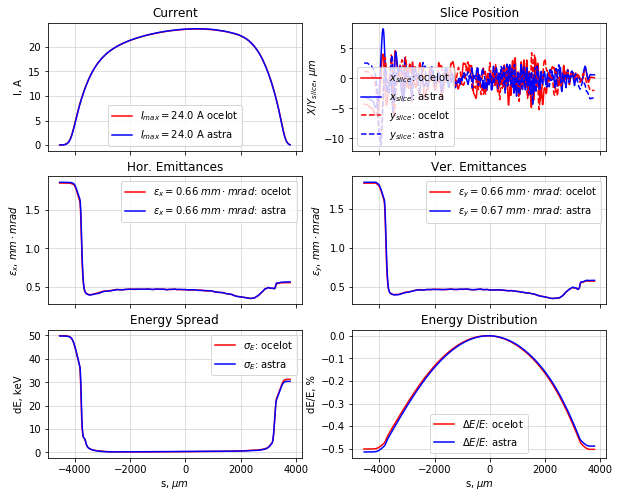

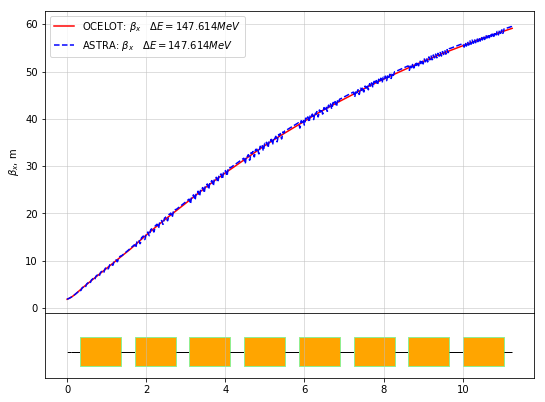

In [5]:
"""
H_max=0.002
H_min=0.0002
! ACC1  1module*8cavities
FILE_EFieLD(2)='tesla4cav_ideal.dat'
Nue(2)=1.3
MaxE(2) = 35.5691
Phi(2) = 0
C_pos(2)=4.04005
FILE_EFieLD(3)='tesla4cav_ideal.dat'
Nue(3)=1.3
MaxE(3) = 35.5691
Phi(3) = 0
"""
p_array_init = load_particle_array("astra_data/init_beam.npz")
tau = p_array_init.tau()
print("d sigma = ",  (np.max(tau) - np.min(tau))*1e6, " um")

p_array_end = load_particle_array("astra_data/ast_end_s2e_ideal_h002_0d_sc.npz")
print("ASTRA: start energy = ", p_array_init.E*1000, " MeV")
print("ASTRA: end energy = ", p_array_end.E*1000, " MeV")
print("ASTRA: end mean energy = ", (1 + np.mean(p_array_end.p()))*p_array_end.E*1000, " MeV")


dE = p_array_end.E - p_array_init.E
de = np.round(dE*1000, 3)
print("ASTRA: dE = ", dE*1000, " MeV")


phi1 = 0.0#21.796390202384082 
#V1= 19.688724956445860*1e-3
V1=dE/np.cos(phi1*pi/180)/8

C_A1_1_1_I1.v = V1; C_A1_1_1_I1.phi = phi1
C_A1_1_2_I1.v = V1; C_A1_1_2_I1.phi = phi1
C_A1_1_3_I1.v = V1; C_A1_1_3_I1.phi = phi1
C_A1_1_4_I1.v = V1; C_A1_1_4_I1.phi = phi1
C_A1_1_5_I1.v = V1; C_A1_1_5_I1.phi = phi1
C_A1_1_6_I1.v = V1; C_A1_1_6_I1.phi = phi1
C_A1_1_7_I1.v = V1; C_A1_1_7_I1.phi = phi1
C_A1_1_8_I1.v = V1; C_A1_1_8_I1.phi = phi1

method = MethodTM()
method.global_method = SecondTM
lat = MagneticLattice(cell, start=start_sim, stop=stop_A1, method=method)

sc1 = SpaceCharge()
sc1.nmesh_xyz = [63, 63, 63]
sc1.step = 1

sc5 = SpaceCharge()
sc5.nmesh_xyz = [63, 63, 63]
sc5.step = 3

navi = Navigator(lat)
navi.unit_step = 0.01
navi.add_physics_proc(sc1, lat.sequence[0], C_A1_1_2_I1)
navi.add_physics_proc(sc5, C_A1_1_2_I1, lat.sequence[-1])

# deep copy of the initial beam distribution 
p_array = deepcopy(p_array_init)
start = time.time()
print("OCELOT: start energy = ", p_array.E*1000, " MeV")
tws_track, p_array = track(lat, p_array, navi)
print()
print("OCELOT: end energy = ", p_array.E*1000, " MeV")
print("OCELOT: end mean energy = ", (1 + np.mean(p_array.p()))*p_array.E*1000, " MeV")


compare_beams(p_array, p_array_end,  legend_beam1="ocelot", legend_beam2="astra", 
              figsize=(10, 8))

print("OCELOT: D_sigma = ", (np.max(p_array.tau()) - np.min(p_array.tau()))*1e6, " um")
print("ASTRA: D_sigma = ", (np.max(p_array_end.tau()) - np.min(p_array_end.tau()))*1e6, " um")
#tws_astra = emittance_analysis(fileprefix="Exfel", s_offset = 0, trace_space=True)

fig, ax_xy = plot_API(lat, legend=False)
fig.set_size_inches(8, 6)
s_oc = [tw.s for tw in tws_track]
bx_oc = [tw.beta_x for tw in tws_track]

s_as3, bx_as3 = np.loadtxt("astra_data/phase_s2e_ideal_as_h002_0d_sc.txt")



ax_xy.plot(s_oc, bx_oc, "r-",  label= "OCELOT:" + r" $\beta_{x} \quad \Delta E="+str(de)+" MeV$")
ax_xy.plot(s_as3, bx_as3, "b--", label= "ASTRA:" + r" $\beta_{x} \quad \Delta E="+str(de)+" MeV$")

ax_xy.set_xlabel(r"s, m")
ax_xy.set_ylabel(r"$\beta_x$, m")

ax_xy.legend()
#plt.savefig("cross_checking.png")
plt.show()

# On crest. 
## without SC. 

d sigma =  8312.407209544674  um
ASTRA: start energy =  6.5573408179118235  MeV
ASTRA: end energy =  160.12081538588993  MeV
ASTRA: end mean energy =  159.89499304486517  MeV
ASTRA: dE =  0.15356347456797811  MeV
OCELOT: start energy =  6.5573408179118235  MeV
z = 11.2484 / 11.248400000000004 : applied:  applied:  
OCELOT: end energy =  160.1208153858901  MeV
OCELOT: end mean energy =  159.89429012083934  MeV
OCELOT: D_sigma =  8336.056345057661  um
ASTRA: D_sigma =  8293.542853911229  um


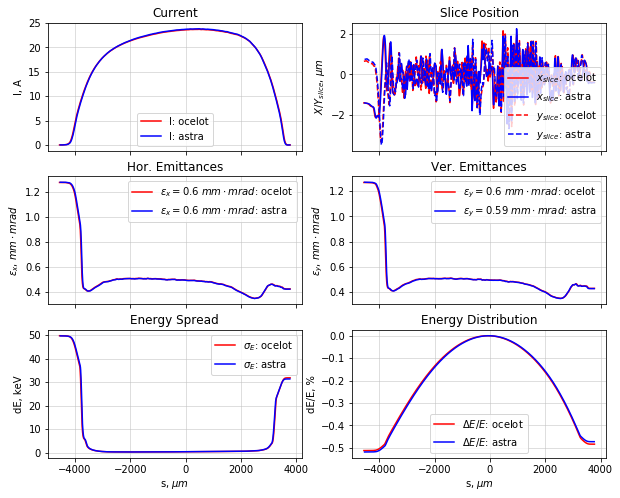

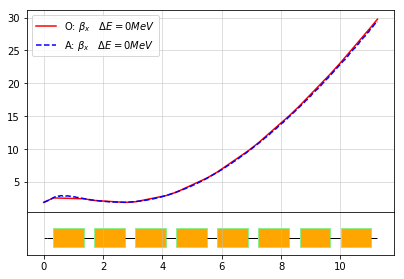

In [20]:
"""
H_max=0.002
H_min=0.0002
! ACC1  1module*8cavities
FILE_EFieLD(2)='tesla4cav.dat'
Nue(2)=1.3
MaxE(2) = 35.5691
Phi(2) = 0
C_pos(2)=4.04005
FILE_EFieLD(3)='tesla4cav.dat'
Nue(3)=1.3
MaxE(3) = 35.5691
Phi(3) = 0
C_pos(3)=9.57445
"""
p_array_init = load_particle_array("astra_data/init_beam.npz")
tau = p_array_init.tau()
print("d sigma = ",  (np.max(tau) - np.min(tau))*1e6, " um")

p_array_end = load_particle_array("astra_data/ast_end_s2e_real_h002_on_crest.npz")
print("ASTRA: start energy = ", p_array_init.E*1000, " MeV")
print("ASTRA: end energy = ", p_array_end.E*1000, " MeV")
print("ASTRA: end mean energy = ", (1 + np.mean(p_array_end.p()))*p_array_end.E*1000, " MeV")


dE = p_array_end.E - p_array_init.E
print("ASTRA: dE = ", dE, " MeV")


phi1 = 0#21.796390202384082 
#V1= 19.688724956445860*1e-3
V1=dE/np.cos(phi1*pi/180)/8

C_A1_1_1_I1.v = V1; C_A1_1_1_I1.phi = phi1
C_A1_1_2_I1.v = V1; C_A1_1_2_I1.phi = phi1
C_A1_1_3_I1.v = V1; C_A1_1_3_I1.phi = phi1
C_A1_1_4_I1.v = V1; C_A1_1_4_I1.phi = phi1
C_A1_1_5_I1.v = V1; C_A1_1_5_I1.phi = phi1
C_A1_1_6_I1.v = V1; C_A1_1_6_I1.phi = phi1
C_A1_1_7_I1.v = V1; C_A1_1_7_I1.phi = phi1
C_A1_1_8_I1.v = V1; C_A1_1_8_I1.phi = phi1

method = MethodTM()
method.global_method = SecondTM
lat = MagneticLattice(cell, start=start_sim, stop=stop_A1, method=method)

sc1 = SpaceCharge()
sc1.nmesh_xyz = [63, 63, 63]
sc1.step = 1

sc5 = SpaceCharge()
sc5.nmesh_xyz = [63, 63, 63]
sc5.step = 5

navi = Navigator(lat)
navi.unit_step = 0.01
#navi.add_physics_proc(sc1, lat.sequence[0], C_A1_1_2_I1)
#navi.add_physics_proc(sc5, C_A1_1_2_I1, lat.sequence[-1])

# deep copy of the initial beam distribution 
p_array = deepcopy(p_array_init)
start = time.time()
print("OCELOT: start energy = ", p_array.E*1000, " MeV")
tws_track, p_array = track(lat, p_array, navi)
print()
print("OCELOT: end energy = ", p_array.E*1000, " MeV")
print("OCELOT: end mean energy = ", (1 + np.mean(p_array.p()))*p_array.E*1000, " MeV")


compare_beams(p_array, p_array_end,  legend_beam1="ocelot", legend_beam2="astra", 
              figsize=(10, 8))

print("OCELOT: D_sigma = ", (np.max(p_array.tau()) - np.min(p_array.tau()))*1e6, " um")
print("ASTRA: D_sigma = ", (np.max(p_array_end.tau()) - np.min(p_array_end.tau()))*1e6, " um")
#tws_astra = emittance_analysis(fileprefix="Exfel", s_offset = 0, trace_space=True)

fig, ax_xy = plot_API(lat, legend=False)
s_oc = [tw.s for tw in tws_track]
bx_oc = [tw.beta_x for tw in tws_track]

s_as3, bx_as3 = np.loadtxt("astra_data/phase_s2e_real_as_h002_on_crest.txt")
#s_as_ps, bx_as_ps = np.loadtxt("astra_data/phase_s2e_real_as_h002_on_crest_ps.txt")


ax_xy.plot(s_oc, bx_oc, "r-",  label= "O:" + r" $\beta_{x} \quad \Delta E=0 MeV$")
ax_xy.plot(s_as3, bx_as3, "b--", label= "A:" + r" $\beta_{x} \quad \Delta E=0 MeV$")
#ax_xy.plot(s_as_ps, bx_as_ps, "g-", label= "A ps:" + r" $\beta_{x} \quad \Delta E=0 MeV$")


ax_xy.legend()
plt.show()